In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import os.path as op
import pandas as pd
import ta_lib.eda.api as eda
from ta_lib.core.api import create_context, merge_info,list_datasets, load_dataset
from ta_lib.core.api import display_as_tabs, initialize_environment
import numpy as np
from datetime import timedelta
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
initialize_environment(debug=False, hide_warnings=True)

/mnt/c/Users/srimanish.surago/Documents/regression-py/regression-py/src/ta_lib/core/utils.py:29: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
/home/srimanishgouds/miniforge3/envs/mle-core-dev/lib/python3.10/site-packages/pydantic/_internal/_config.py:295: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)


In [4]:
sales_data = pd.read_csv('../../data/sales_data.csv')
social_media_data = pd.read_excel('../../data/social_media_data.xlsx')
google_search_data = pd.read_csv('../../data/google_search_data.csv')
Theme_product_list = pd.read_csv('../../data/Theme_product_list.csv')
Theme_list = pd.read_csv('../../data/Theme_list.csv')
product_manufacturer_list = pd.read_csv('../../data/product_manufacturer_list.csv')

In [5]:
social_media_data

Theme Id       published_date  total_post
0          148.0  2015-01-10 00:00:00          76
1          148.0  2015-10-10 00:00:00          31
2          148.0  2015-11-10 00:00:00          65
3          148.0  2015-12-10 00:00:00          88
4          148.0           10/13/2015          85
...          ...                  ...         ...
533385     876.0  2019-05-09 00:00:00        4658
533386     876.0  2019-06-09 00:00:00        3731
533387     876.0  2019-07-09 00:00:00        2336
533388     876.0  2019-08-09 00:00:00        1374
533389     876.0  2019-09-09 00:00:00        1442

[533390 rows x 3 columns]

## Exploratory Analysis

In [5]:
# shapes of datasets
display_as_tabs([('sales_data', sales_data.shape),
                 ('social_media_data', social_media_data.shape), 
                 ('google_search_data', google_search_data.shape),
                 ('Theme_product_list', Theme_product_list.shape),
                 ('Theme_list', Theme_list.shape),
                 ('product_manufacturer_list', product_manufacturer_list.shape) ])

BokehModel(combine_events=True, render_bundle={'docs_json': {'4c2672c1-c869-4311-89a8-5ca6086ef293': {'version…

In [29]:
social_media_data['published_date'] = pd.to_datetime(social_media_data['published_date'], errors='coerce', infer_datetime_format=True)
google_search_data["date"]= pd.to_datetime(google_search_data["date"], format="%d-%m-%Y")
sum1 = eda.get_variable_summary(sales_data)
sum2 = eda.get_variable_summary(social_media_data)
sum3 = eda.get_variable_summary(google_search_data)
sum4 = eda.get_variable_summary(Theme_product_list)
sum5 = eda.get_variable_summary(Theme_list)
sum6 = eda.get_variable_summary(product_manufacturer_list)

display_as_tabs([('sales_data', sum1),
                ('social_media_data', sum2),
                ('google_search_data', sum3),
                ('Theme_product_list', sum4),
                ('Theme_list', sum5),
                ('product_manufacturer_list', sum6)])

BokehModel(combine_events=True, render_bundle={'docs_json': {'54bb29f2-83b3-44c7-8e1e-c29518009642': {'version…

In [7]:
nan1= sales_data.isna().sum()
nan2= social_media_data.isna().sum()
nan3= google_search_data.isna().sum()
nan4= Theme_product_list.isna().sum()
nan5= Theme_list.isna().sum()
nan6= product_manufacturer_list.isna().sum()

display_as_tabs([('sales_data', nan1),
                ('social_media_data', nan2),
                ('google_search_data', nan3),
                ('Theme_product_list', nan4),
                ('Theme_list', nan5),
                ('product_manufacturer_list', nan6)])

BokehModel(combine_events=True, render_bundle={'docs_json': {'ff403d7e-2be8-4a37-8697-78b011772b7b': {'version…

In [8]:
sum1 = eda.get_duplicate_columns(sales_data)
sum2 = eda.get_duplicate_columns(social_media_data)
sum3 = eda.get_duplicate_columns(google_search_data)
sum4 = eda.get_duplicate_columns(Theme_product_list)
sum5 = eda.get_duplicate_columns(Theme_list)
sum6 = eda.get_duplicate_columns(product_manufacturer_list)

display_as_tabs([('sales_data', sum1),
                ('social_media_data', sum2),
                ('google_search_data', sum3),
                ('Theme_product_list', sum4),
                ('Theme_list', sum5),
                ('product_manufacturer_list', sum6)])

BokehModel(combine_events=True, render_bundle={'docs_json': {'501c5c5e-35bc-496f-8fdf-31f00900a0c8': {'version…

`product_manufacturer_list` has duplicate columns with unnamed names

In [9]:
sum1 = eda.get_outliers(sales_data)
sum2 = eda.get_outliers(social_media_data)
sum3 = eda.get_outliers(google_search_data)
sum4 = eda.get_outliers(Theme_product_list)
sum5 = eda.get_outliers(Theme_list)
sum6 = eda.get_outliers(product_manufacturer_list)

display_as_tabs([('sales_data', sum1),
                ('social_media_data', sum2),
                ('google_search_data', sum3),
                ('Theme_product_list', sum4),
                ('Theme_list', sum5),
                ('product_manufacturer_list', sum6)])

BokehModel(combine_events=True, render_bundle={'docs_json': {'57a7d9a2-94ea-404b-b1d6-381908da6200': {'version…

In [10]:
sum1, plot1 = eda.get_data_health_summary(sales_data, return_plot=True)
sum2, plot2 = eda.get_data_health_summary(social_media_data, return_plot=True)
sum3, plot3 = eda.get_data_health_summary(google_search_data, return_plot=True)
sum4, plot4 = eda.get_data_health_summary(Theme_product_list, return_plot=True)
sum5, plot5 = eda.get_data_health_summary(Theme_list, return_plot=True)
sum6, plot6 = eda.get_data_health_summary(product_manufacturer_list, return_plot=True)

display_as_tabs([('sales_data', plot1), ('social_media_data', plot2), ('google_search_data', plot3), ('Theme_product_list', plot4),('Theme_list', plot5), ('product_manufacturer_list', plot6)])

BokehModel(combine_events=True, render_bundle={'docs_json': {'688e9f06-72a7-44a0-a8f2-4de0e3b8ae80': {'version…

`social media data` has missing values in Theme ID

In [11]:
print('number of duplicates rows where search_volume is different for same date and same platform :->' , google_search_data[['date' , 'platform' , 'Claim_ID']].duplicated().sum())

number of duplicates rows where search_volume is different for same date and same platform :-> 2483


In [12]:
duplicate_groups = google_search_data.groupby(['date', 'platform', 'Claim_ID'])
duplicates_with_different_volume = duplicate_groups.filter(
    lambda x: x['searchVolume'].nunique() > 1
)
print(
    'Total number of rows where search_volume is different for same date, platform, and Claim_ID :->',
    len(duplicates_with_different_volume)
)
print(duplicates_with_different_volume.head())

Total number of rows where search_volume is different for same date, platform, and Claim_ID :-> 4886
           date platform  searchVolume  Claim_ID  week_number  year_new
9108 2014-01-02   google           707       967            1      2014
9109 2014-01-03   google          2121       967            1      2014
9110 2014-01-05   google          2474       967            1      2014
9111 2014-01-07   google           354       967            2      2014
9112 2014-01-08   google          1767       967            2      2014


In [13]:
google_search_data[(google_search_data['date']=='02-01-2014') & (google_search_data['platform']=='google') & (google_search_data['Claim_ID']==967)]

date platform  searchVolume  Claim_ID  week_number  year_new
9134  2014-02-01   google           707       967            5      2014
12696 2014-02-01   google          5547       967            5      2014

## Cleaning

In [6]:
sales_data_clean = (
    sales_data
    .copy()
    .change_type(['sales_dollars_value'], np.int64)
    .to_datetime('system_calendar_key_N', format='%Y%m%d')
    .rename_columns({'system_calendar_key_N': 'date'})
    .clean_names(case_type='snake')
)
sales_data_clean.head()

date  product_id  sales_dollars_value  sales_units_value  \
0 2016-01-09           1                13927                934   
1 2016-01-09           3                10289               1592   
2 2016-01-09           4                  357                 22   
3 2016-01-09           6                23113               2027   
4 2016-01-09           7                23177               3231   

   sales_lbs_value  
0            18680  
1            28646  
2              440  
3            81088  
4            58164

In [7]:
social_media_data_clean = (
    social_media_data
    .copy()
    .replace({'': np.NaN})
    .dropna(axis = 0)
    .change_type(['Theme Id'], np.int64)
    .to_datetime('published_date')
    .rename_columns({'Theme Id': 'claim_id' ,'published_date' : 'date' } )                                                                                                                               
    .clean_names(case_type='snake')
    .drop_duplicates()
)

social_media_data_clean.head(5)

claim_id       date  total_post
0       148 2015-01-10          76
1       148 2015-10-10          31
2       148 2015-11-10          65
3       148 2015-12-10          88
4       148 2015-10-13          85

In [8]:
theme_product_list_clean= (
    Theme_product_list
    .copy()                                                                                                                               
    .clean_names(case_type='snake')
)
theme_product_list_clean.head()

product_id  claim_id
0          26         8
1          29         8
2          48        81
3          50        81
4          74       227

In [9]:
product_manufacturer_list_clean = (
    product_manufacturer_list
    .copy()
    .drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1)                                                                                                               
    .clean_names(case_type='snake')
)
product_manufacturer_list_clean.head(5)

product_id  vendor
0           1  Others
1           2  Others
2           3  Others
3           4  Others
4           5  Others

In [10]:
theme_list_clean = (
    Theme_list
    .copy()
    .passthrough()    
    .replace({'': np.NaN})
    .clean_names(case_type='snake')
)
theme_list_clean.head(5)

claim_id claim_name
0         0   No Claim
1         8   low carb
2        15      beans
3        16      cocoa
4        26    vanilla

In [11]:
google_search_data_clean = (
    google_search_data
    .copy()
    .replace({'': np.NaN})
    .to_datetime('date', format='%d-%m-%Y')
    .sort_values(by=['searchVolume'],ascending=False)
    .rename_columns({'year_new' : 'year'})
    .drop_duplicates(subset = ['date' , 'Claim_ID' , 'platform'],keep = 'first').reset_index(drop = True)
    .clean_names(case_type='snake')    
)
google_search_data_clean.head(5)

date platform  search_volume  claim_id  week_number  year
0 2018-01-10   google         370484       657            2  2018
1 2018-01-09   google         259069       657            2  2018
2 2018-01-11   google         197772       657            2  2018
3 2016-10-30   google         169543       158           43  2016
4 2015-10-02   google         145848       158           40  2015

## Provide the list of themes available across all data sources

In [20]:
print("Unique Themes =  {}".format(theme_list_clean['claim_id'].nunique()))
print("Themes: \n", theme_list_clean['claim_name'].unique())

Unique Themes =  208
Themes: 
 ['No Claim' 'low carb' 'beans' 'cocoa' 'vanilla' 'stroganoff' 'cumin'
 'high/source of protein' 'no additives/preservatives' 'buckwheat'
 'tutti frutti' 'ethical - not specific' 'brown ale' 'french bisque'
 'pheasant' 'whitebait' 'gmo free' 'low calorie' 'peach' 'crab' 'nuts'
 'venison' 'fruit' 'convenience - easy-to-prepare' 'anchovy' 'pomegranate'
 'scallop' 'american gumbo' 'tuna' 'low sodium' 'low sugar' 'french'
 'chicken' 'ethical - packaging' 'cherry' 'vitamin/mineral fortified'
 'liver' 'red raspberry' 'cookie' 'pollock' 'blueberry' 'bone health'
 'prebiotic' 'poultry' 'cheddar cheese' 'energy/alertness' 'halal' 'herbs'
 'pizza' 'american southwest style' 'salmon' 'beef hamburger' 'tilapia'
 'mackerel' 'peanut' 'lobster' 'sea salt' 'soy foods' 'apple cinnamon'
 'gingerbread' 'vegetarian' 'ethnic & exotic' 'cream' 'berry'
 'gluten free' 'added calcium' 'added fiber' 'added iron' 'added protein'
 'allergy' 'anti-aging/aging-well' 'antioxidant' 'baco

### Themes in Google Search Data

In [21]:
print("List of Unique Themes in Google_Search_Data =  {} \n".format(google_search_data_clean['claim_id'].nunique()))
gsd_themes_list = []
for i in sorted(google_search_data_clean['claim_id'].unique()):
    gsd_themes_list.append(theme_list_clean[theme_list_clean['claim_id']==i]['claim_name'].to_list()[0])
print(gsd_themes_list)

List of Unique Themes in Google_Search_Data =  160 

['low carb', 'high/source of protein', 'no additives/preservatives', 'ethical - not specific', 'french bisque', 'pheasant', 'gmo free', 'low calorie', 'peach', 'crab', 'nuts', 'venison', 'fruit', 'convenience - easy-to-prepare', 'tuna', 'low sodium', 'low sugar', 'chicken', 'ethical - packaging', 'vitamin/mineral fortified', 'liver', 'blueberry', 'bone health', 'prebiotic', 'poultry', 'cheddar cheese', 'energy/alertness', 'halal', 'salmon', 'beef hamburger', 'mackerel', 'sea salt', 'soy foods', 'gingerbread', 'vegetarian', 'ethnic & exotic', 'meat', 'toffee', 'digestive/gut health', 'white cheddar cheese', 'microwaveable', 'health (active)', 'ethical', 'sardine', 'mango', 'fish', 'allergy', 'natural', 'kosher', 'low cholesterol', 'parmesan cheese', 'weight management', 'wholegrain', 'health (passive)', 'heart meat', 'convenience - time saving', 'hfcs free', 'choice', 'cinnamon', 'pleasure', 'hemp seeds', 'carrot', 'sugar free', 'swee

### Themes in Social Media Data

In [22]:
print("List of Unique Themes in social_media_data =  {} \n".format(social_media_data_clean['claim_id'].nunique()))

smd_themes_list = []
for i in sorted(social_media_data_clean['claim_id'].unique()):
   smd_themes_list.append(theme_list_clean[theme_list_clean['claim_id']==i]['claim_name'].to_list()[0])
print(smd_themes_list)

List of Unique Themes in social_media_data =  193 

['low carb', 'beans', 'vanilla', 'cumin', 'high/source of protein', 'no additives/preservatives', 'ethical - not specific', 'french bisque', 'pheasant', 'gmo free', 'low calorie', 'peach', 'crab', 'nuts', 'venison', 'fruit', 'convenience - easy-to-prepare', 'anchovy', 'pomegranate', 'scallop', 'american gumbo', 'tuna', 'low sodium', 'low sugar', 'chicken', 'ethical - packaging', 'cherry', 'vitamin/mineral fortified', 'liver', 'red raspberry', 'blueberry', 'bone health', 'prebiotic', 'poultry', 'cheddar cheese', 'energy/alertness', 'halal', 'herbs', 'salmon', 'beef hamburger', 'mackerel', 'peanut', 'lobster', 'sea salt', 'soy foods', 'gingerbread', 'vegetarian', 'ethnic & exotic', 'cream', 'berry', 'meat', 'cola', 'toffee', 'digestive/gut health', 'white cheddar cheese', 'microwaveable', 'brownie', 'health (active)', 'blood orange', 'ethical', 'quail', 'sardine', 'mango', 'fish', 'allergy', 'pepper', 'natural', 'kosher', 'low cholester

### Themes in Sales Data

In [23]:
# merging sales_data_clean and Themes_product_list_data to get claim_id 
merge_df1 = pd.merge(sales_data_clean , theme_product_list_clean , on = 'product_id' , how='inner')

In [24]:
print("List of Unique Themes in sales_data =  {} \n".format(merge_df1['claim_id'].nunique()))

sd_themes_list = []
for i in sorted(merge_df1['claim_id'].unique()):
    sd_themes_list.append(theme_list_clean[theme_list_clean['claim_id']==i]['claim_name'].to_list()[0])
print(sd_themes_list)

List of Unique Themes in sales_data =  49 

['No Claim', 'low carb', 'beans', 'cocoa', 'stroganoff', 'cumin', 'high/source of protein', 'no additives/preservatives', 'buckwheat', 'ethical - not specific', 'brown ale', 'french bisque', 'gmo free', 'low calorie', 'peach', 'crab', 'nuts', 'convenience - easy-to-prepare', 'scallop', 'american gumbo', 'tuna', 'low sodium', 'low sugar', 'chicken', 'ethical - packaging', 'cherry', 'red raspberry', 'cookie', 'pollock', 'blueberry', 'bone health', 'prebiotic', 'poultry', 'energy/alertness', 'halal', 'herbs', 'pizza', 'american southwest style', 'salmon', 'beef hamburger', 'tilapia', 'mackerel', 'peanut', 'sea salt', 'soy foods', 'apple cinnamon', 'gingerbread', 'vegetarian', 'ethnic & exotic']


In [25]:
### Bar graph of unique themes in all data sources
unique_theme_count = pd.DataFrame({'Data Source':["Google Search Data", "Social Media Data", "Sales Themes List" , "Total Themes"], 'Theme Count':[google_search_data_clean['claim_id'].nunique(), social_media_data_clean['claim_id'].nunique(),merge_df1['claim_id'].nunique(), theme_list_clean['claim_id'].nunique()]})
plt.figure(figsize=(7,5))
plt.title('Bar graph comparing count of unique themes in each Data Source')
plt.xticks(rotation = 0)
ax = sns.barplot(x = 'Data Source' , y=
                 'Theme Count' , data = unique_theme_count)
ax.bar_label(ax.containers[0])
plt.show()

## Understand the overall market share of our client

In [26]:
#merging sales_data_clean with prodcut_manufacturer list data to get vendors
sales_vendor_data= pd.merge(sales_data_clean, product_manufacturer_list_clean, how='inner', on='product_id')
#extracting year from sales_vendor_data
sales_vendor_data['year'] = sales_vendor_data['date'].dt.year

In [27]:
Total_market_by_vendors = sales_vendor_data.groupby(['vendor'])['sales_dollars_value'].sum().reset_index().sort_values(by=['sales_dollars_value'],ascending=False)
Total_market_by_vendors

vendor  sales_dollars_value
0              A          30932043838
7         Others          18544185685
1              B          15380744477
2              D          11966827292
8  Private Label           9753069976
4              F           4995877178
6              H           2277656583
5              G           1951154868
3              E           1939263347

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
labels = Total_market_by_vendors['vendor'].tolist()
sizes = Total_market_by_vendors['sales_dollars_value'].tolist()
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

colors = sns.color_palette("pastel")[0:len(labels)]
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    explode=explode,
    autopct=lambda pct: f"{pct:.1f}%\n(${int(pct/100*sum(sizes)):,})",
    startangle=90,
    counterclock=False,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},  # Donut!
    textprops=dict(color="black", fontsize=9)
)

ax.legend(wedges, labels, title="Vendors", loc="center left", bbox_to_anchor=(1, 0.5))
ax.text(0, 0, "Market Share", ha='center', va='center', fontsize=12, weight='bold')
ax.axis('equal')
plt.title("Market Share of Our Client A", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


## Find the potential competitors for our client in each theme

In [29]:
#adding claim_id
sales_vendor_claim_merge = pd.merge(sales_vendor_data, theme_product_list_clean, how='inner', on='product_id')

In [30]:
# adding claim_name
sales_vendor_claim_name_merge = pd.merge(sales_vendor_claim_merge, theme_list_clean, how='inner', on='claim_id')

### Top 10 themes of A

In [31]:
sales_vendor_claim_merge_a = sales_vendor_claim_name_merge[sales_vendor_claim_name_merge['vendor'] == 'A']
sales_by_themes = sales_vendor_claim_merge_a.groupby(['claim_name'])['sales_dollars_value'].sum().reset_index()
total_sales = sales_by_themes['sales_dollars_value'].sum()
sales_by_themes['percentage'] = (sales_by_themes['sales_dollars_value'] / total_sales) * 100
top_10_themes = sales_by_themes.sort_values(by='sales_dollars_value', ascending=False)[1:11].reset_index(drop=True)

top_10_themes


claim_name  sales_dollars_value  percentage
0                    low carb           2430267266    6.376422
1  no additives/preservatives           1693283683    4.442759
2                  stroganoff           1649480378    4.327830
3                      salmon           1506344323    3.952276
4                   soy foods           1265848375    3.321274
5              apple cinnamon           1241048493    3.256205
6                     pollock           1069257354    2.805467
7                      cookie            789818745    2.072289
8                       pizza            789818745    2.072289
9             ethnic & exotic            606609483    1.591594

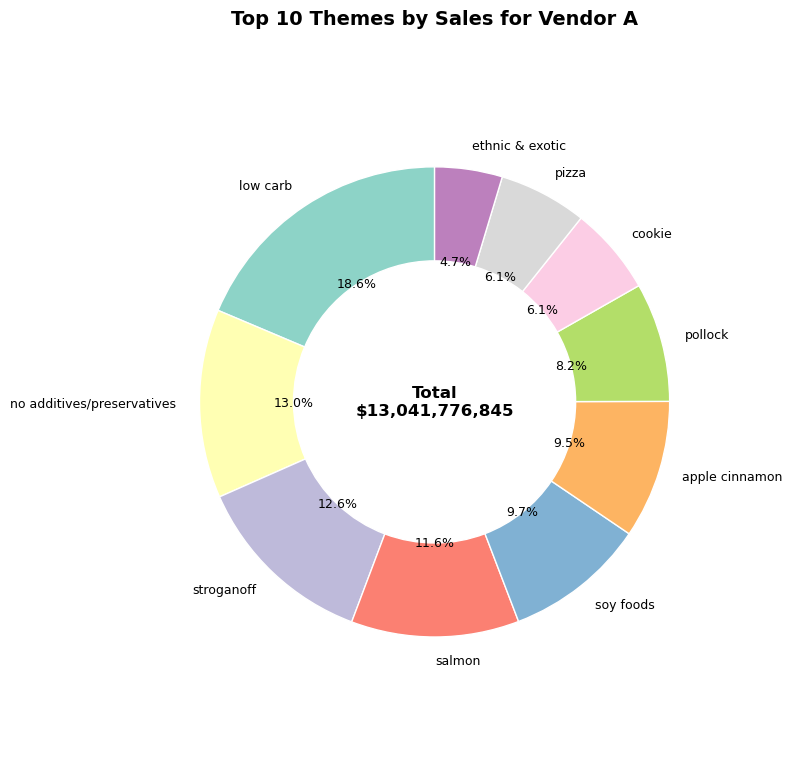

In [32]:
import matplotlib.pyplot as plt

# Data setup
labels = top_10_themes['claim_name'].tolist()
sizes = top_10_themes['sales_dollars_value'].tolist()
colors = plt.cm.Set3.colors  # You can also try 'tab10' or 'Pastel1'

# Create donut chart
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='white'),
    textprops=dict(color="black", fontsize=9)
)

# Draw center circle text
total_sales = sum(sizes)
ax.text(0, 0, f"Total\n${int(total_sales):,}", ha='center', va='center', fontsize=12, fontweight='bold')

# Equal aspect ratio ensures a perfect circle
ax.axis('equal')

# Title and layout
plt.title("Top 10 Themes by Sales for Vendor A", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [33]:
sales_vendor_claim_name_merge.describe()

date    product_id  sales_dollars_value  \
count                        7767420  7.767420e+06         7.767420e+06   
mean   2017-12-15 19:49:30.516542976  2.719737e+04         1.956811e+04   
min              2016-01-09 00:00:00  1.000000e+00         0.000000e+00   
25%              2017-01-21 00:00:00  1.446500e+04         6.780000e+02   
50%              2017-12-30 00:00:00  2.721600e+04         3.097000e+03   
75%              2018-11-17 00:00:00  3.905600e+04         1.253800e+04   
max              2019-10-05 00:00:00  5.731700e+04         4.395964e+06   
std                              NaN  1.440538e+04         6.762102e+04   

       sales_units_value  sales_lbs_value          year      claim_id  
count       7.767420e+06     7.767420e+06  7.767420e+06  7.767420e+06  
mean        3.610720e+03     1.315570e+04  2.017471e+03  9.086082e+01  
min         1.000000e+00     0.000000e+00  2.016000e+03  0.000000e+00  
25%         7.900000e+01     1.100000e+02  2.017000e+03  0.000000e+00  
50%         3.510000e+02     7.190000e+02  2.017000e+03  3.200000e+01  
75%         1.397000e+03     3.814000e+03  2.018000e+03  1.850000e+02  
max         8.739980e+05     1.100310e+07  2.019000e+03  4.380000e+02  
std         2.080517e+04     9.969849e+04  1.075750e+00  1.321988e+02

In [34]:
competitor_by_theme = sales_vendor_claim_name_merge.groupby(['claim_name','vendor'])['sales_dollars_value'].sum().reset_index().sort_values(by=['sales_dollars_value'],ascending=False)
display = []
display_name = []
display_pic = []
competitor_dict = {}
for  i in (set(sales_vendor_claim_name_merge['claim_name'].to_list())):
    display.append(competitor_by_theme[competitor_by_theme['claim_name'] == i].sort_values(by = 'sales_dollars_value', ascending = False))
    display_name.append(i)
    competitor_dict[i] = competitor_by_theme[competitor_by_theme['claim_name'] == i].sort_values(by = 'sales_dollars_value', ascending = False)
result = zip(display_name,display)
display_as_tabs(list(result))

BokehModel(combine_events=True, render_bundle={'docs_json': {'adb77554-452a-4d97-9c84-ac6fc38906cb': {'version…

## Understands consumer preference(themes) available in each data source

In [35]:
preference_merge = pd.merge(google_search_data_clean, theme_list_clean, how='inner', on='claim_id')

In [36]:
preference = preference_merge.groupby(['year','claim_name'])['search_volume'].sum().reset_index().sort_values(by=['year','search_volume'],ascending=[False,False])
Y2019 = preference[preference['year'] == 2019]
Y2018 = preference[preference['year'] == 2018]
Y2017 = preference[preference['year'] == 2017]
Y2016 = preference[preference['year'] == 2016]
Y2015 = preference[preference['year'] == 2015]
Y2014 = preference[preference['year'] == 2014]
display_as_tabs([('2019', Y2019.head(10)), ('2018', Y2018.head(10)), ('2017', Y2017.head(10)), ('2016', Y2016.head(10)),('2015', Y2015.head(10)), ('2014', Y2014.head(10))])

BokehModel(combine_events=True, render_bundle={'docs_json': {'1084d4bc-49f1-4b2a-9678-2dc01c45cfd3': {'version…

`ethical-environment` , `sugar free` , `shrimp` , `honey` , `health(passive)` are the most preferable themes across all yearls

In [37]:
social_media_data_clean["year"] = social_media_data_clean["date"].dt.year
preference_merge_social_media = pd.merge(social_media_data_clean, theme_list_clean, how='inner', on='claim_id')

In [38]:
preference = preference_merge_social_media.groupby(['year','claim_name'])['total_post'].sum().reset_index().sort_values(by=['year','total_post'],ascending=[False,False])
Y2019 = preference[preference['year'] == 2019]
Y2018 = preference[preference['year'] == 2018]
Y2017 = preference[preference['year'] == 2017]
Y2016 = preference[preference['year'] == 2016]
Y2015 = preference[preference['year'] == 2015]
display_as_tabs([('2019', Y2019.head(10)), ('2018', Y2018.head(10)), ('2017', Y2017.head(10)), ('2016', Y2016.head(10)),('2015', Y2015.head(10))])

BokehModel(combine_events=True, render_bundle={'docs_json': {'119f124b-2cfa-4d7b-b218-b1f82e23fdc7': {'version…

`health(passive)`, `boar`, `rabbit`, `pumpkin`, `probiotic` are the most posted themes across all years

## What are the themes which are emerging in social media, Google Search & Sales?

In [12]:
google_search_data_clean['month'] = google_search_data_clean['date'].dt.month
google_search_data_clean['month_name'] = google_search_data_clean['date'].dt.month_name().str[0:3]
google_search_data_clean['week_number']=pd.Series(google_search_data_clean['date']+timedelta(1)).dt.isocalendar().week

In [13]:
social_media_data_clean['year'] = social_media_data_clean['date'].dt.year
social_media_data_clean['month'] = social_media_data_clean['date'].dt.month
social_media_data_clean['month_name'] = social_media_data_clean['date'].dt.month_name().str[0:3]

social_media_data_clean['week_number']=pd.Series(social_media_data_clean['date']+timedelta(1)).dt.isocalendar().week

In [14]:
google_search_data_clean

date platform  search_volume  claim_id  week_number  year  month  \
0      2018-01-10   google         370484       657            2  2018      1   
1      2018-01-09   google         259069       657            2  2018      1   
2      2018-01-11   google         197772       657            2  2018      1   
3      2016-10-30   google         169543       158           44  2016     10   
4      2015-10-02   google         145848       158           40  2015     10   
...           ...      ...            ...       ...          ...   ...    ...   
179077 2018-02-17   google              1       163            7  2018      2   
179078 2018-02-21   google              1       163            8  2018      2   
179079 2018-02-22   google              1       163            8  2018      2   
179080 2017-11-29   google              1       754           48  2017     11   
179081 2017-06-20   google              1       754           25  2017      6   

       month_name  
0             Jan  
1             Jan  
2             Jan  
3             Oct  
4             Oct  
...           ...  
179077        Feb  
179078        Feb  
179079        Feb  
179080        Nov  
179081        Jun  

[179082 rows x 8 columns]

In [15]:
sales_data_clean['year'] = sales_data_clean['date'].dt.year
sales_data_clean['week_number'] = sales_data_clean['date'].dt.isocalendar().week
sales_data_clean['month'] = sales_data_clean['date'].dt.month
sales_data_clean['month_name'] = sales_data_clean['date'].dt.month_name().str[0:3]

### filtering claim_id which is common between google search data and sales data

In [43]:
sales_claim = sales_vendor_claim_name_merge['claim_id'].unique()
filtered_claim_google_search = preference_merge[preference_merge['claim_id'].isin(sales_claim)]

In [44]:
filtered_claim_google_search

date platform  search_volume  claim_id  week_number  year  \
2235   2016-10-30   google         169543       158           43  2016   
2236   2015-10-02   google         145848       158           40  2015   
2237   2015-10-30   google         133592       158           44  2015   
2238   2015-10-25   google         130732       158           43  2015   
2239   2015-10-05   google         130732       158           41  2015   
...           ...      ...            ...       ...          ...   ...   
179055 2017-09-05   google             11       101           36  2017   
179056 2019-06-04   google              8       101           23  2019   
179057 2017-05-06   google              5       101           18  2017   
179058 2019-09-25   google              4       101           39  2019   
179059 2017-02-23   google              1       101            8  2017   

       claim_name  
2235      chicken  
2236      chicken  
2237      chicken  
2238      chicken  
2239      chicken  
...           ...  
179055      peach  
179056      peach  
179057      peach  
179058      peach  
179059      peach  

[39654 rows x 7 columns]

In [45]:
preference = filtered_claim_google_search.groupby(['year','claim_name'])['search_volume'].sum().reset_index().sort_values(by=['year','search_volume'],ascending=[False,False])
Y2019 = preference[preference['year'] == 2019]
Y2018 = preference[preference['year'] == 2018]
Y2017 = preference[preference['year'] == 2017]
Y2016 = preference[preference['year'] == 2016]
Y2015 = preference[preference['year'] == 2015]
Y2014 = preference[preference['year'] == 2014]
display_as_tabs([('2019', Y2019.head(10)), ('2018', Y2018.head(10)), ('2017', Y2017.head(10)), ('2016', Y2016.head(10)),('2015', Y2015.head(10)), ('2014', Y2014.head(10))])

BokehModel(combine_events=True, render_bundle={'docs_json': {'909b3da7-a830-45be-93fa-c691a8bf4bf0': {'version…

In [46]:
merge_df4= pd.merge( google_search_data_clean, theme_list_clean , on = 'claim_id' , how='left')

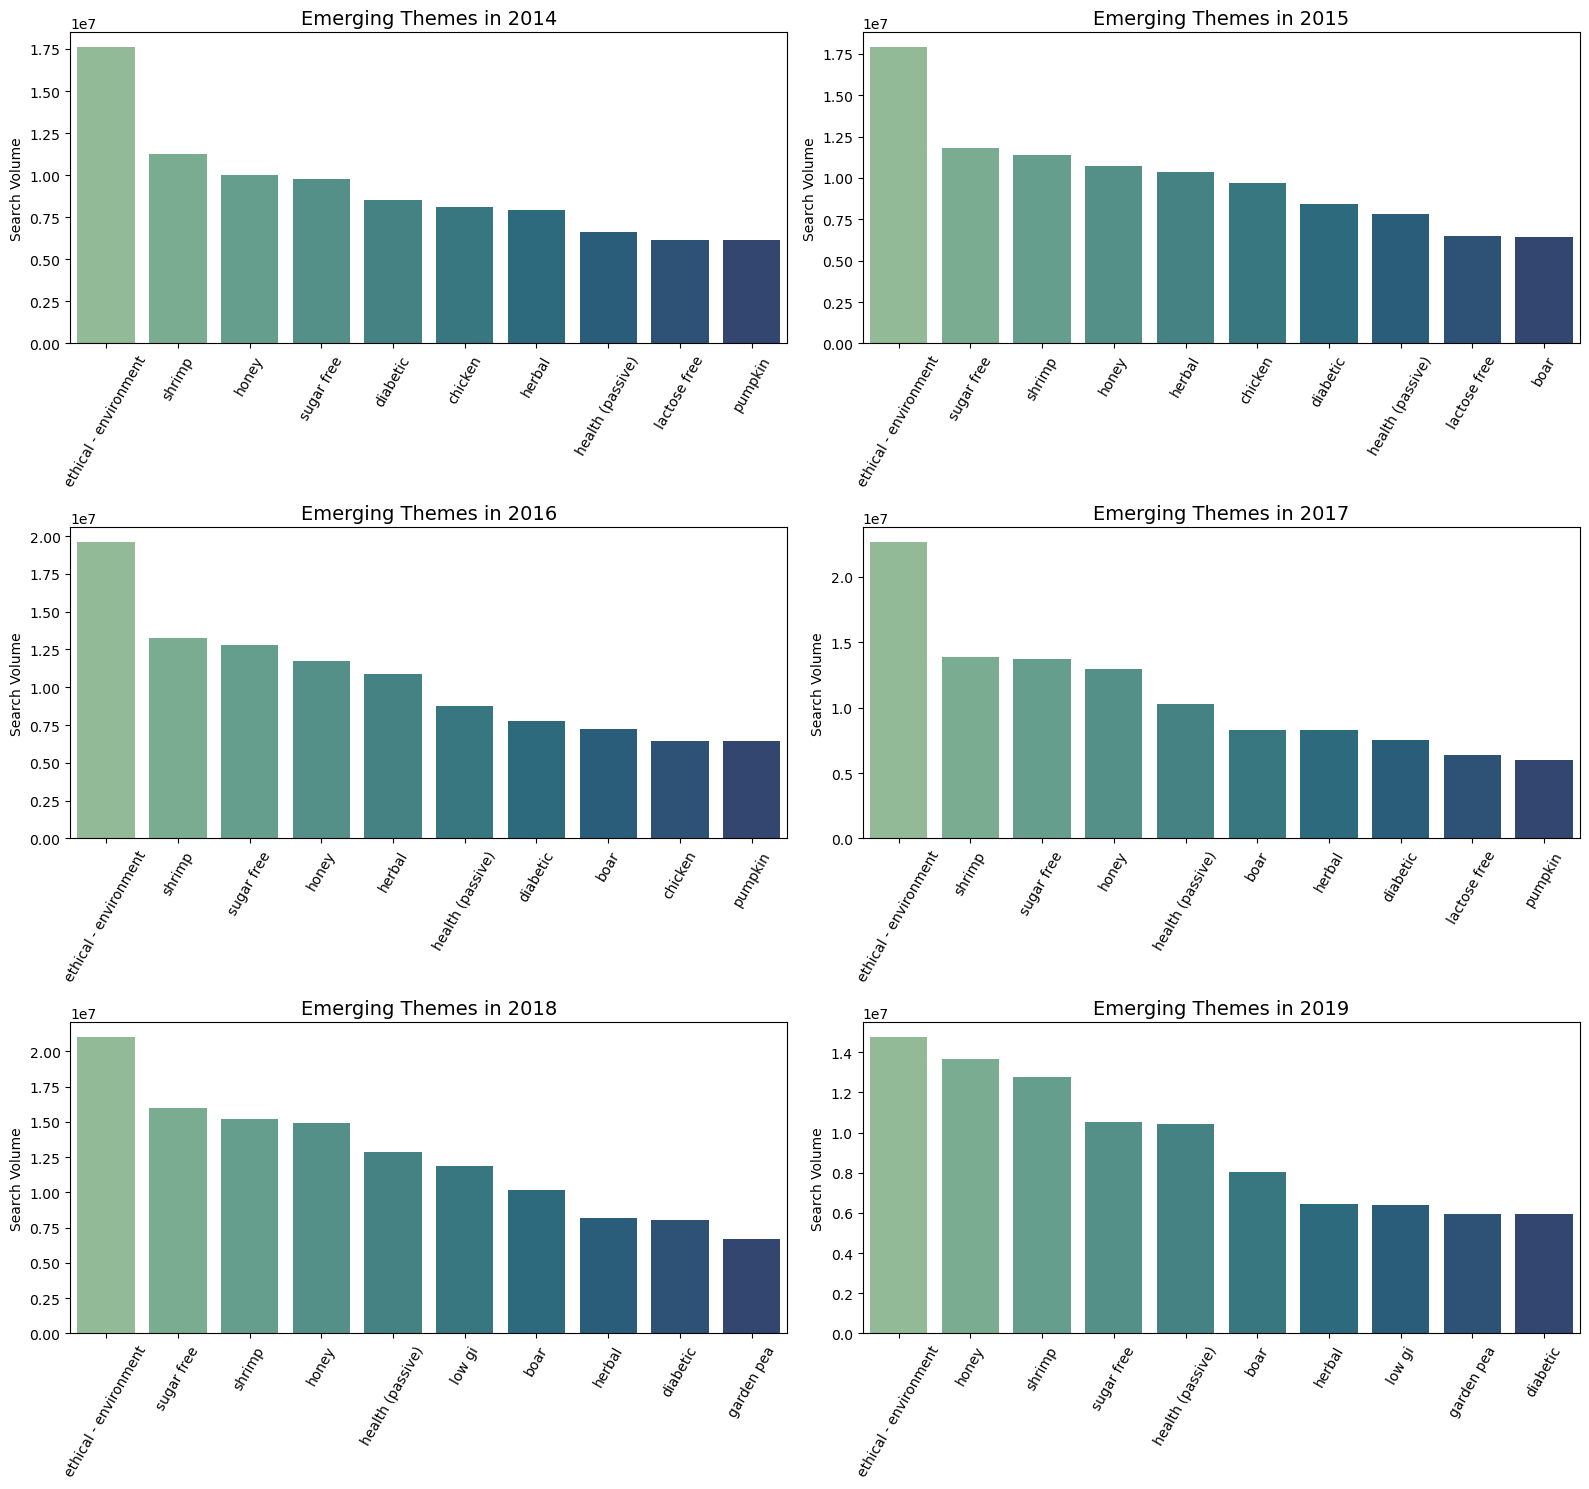

In [47]:


total_search_yearly =merge_df4.groupby(['claim_name' , 'year'])['search_volume'].sum().sort_values(ascending = False).reset_index()
years = sorted(total_search_yearly.year.unique().tolist())
cols = 2
rows = (len(years) + 1) // 2

fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axes = axes.flatten()
for i, year in enumerate(years):
    ax = axes[i]
    top_themes = total_search_yearly[total_search_yearly['year'] == year].nlargest(10, 'search_volume')

    sns.barplot(x='claim_name', y='search_volume', data=top_themes, ax=ax, palette='crest')
    ax.set_title(f'Emerging Themes in {year}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Search Volume')
    ax.tick_params(axis='x', rotation=60)

for j in range(len(years), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

`ethical-environment` , `sugar free` , `shrimp` , `honey` , `health(passive)` are the Emerging themes across all yearls

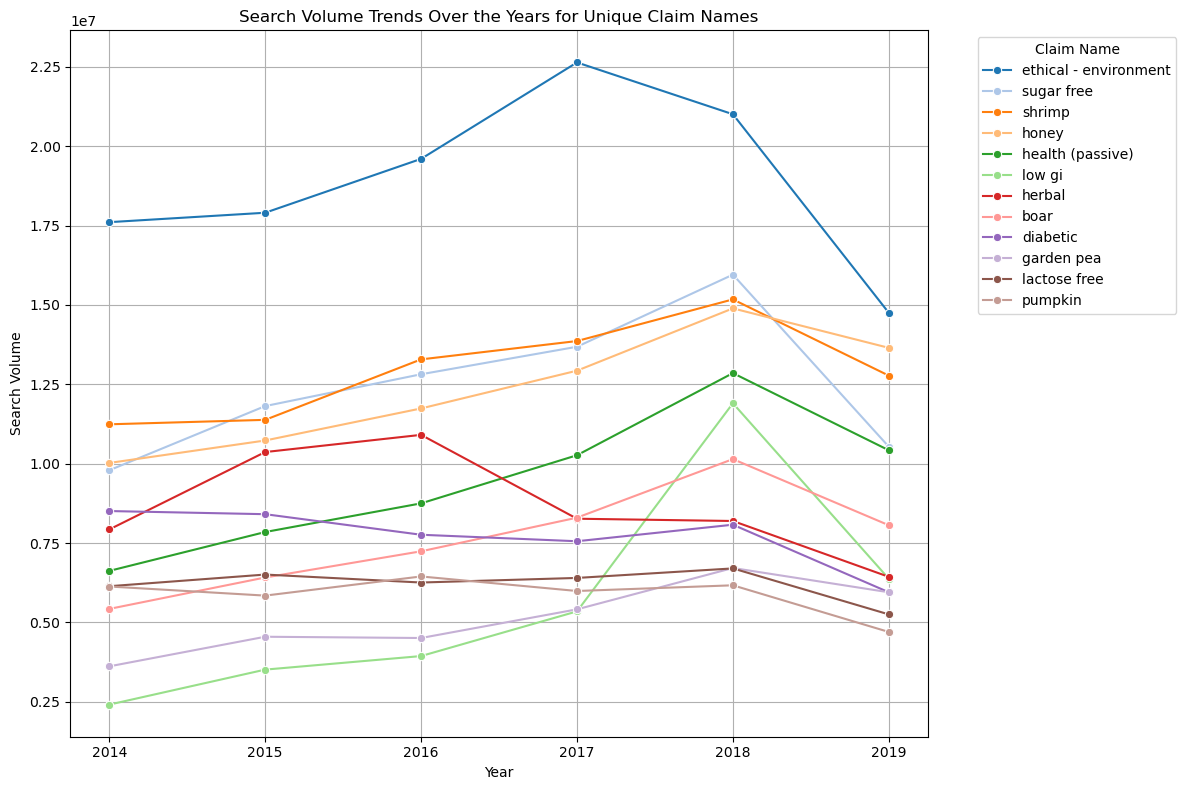

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_claim_names = ['boar', 'diabetic', 'ethical - environment', 'garden pea', 'health (passive)', 
                      'herbal', 'honey', 'lactose free', 'low gi', 'pumpkin', 'shrimp', 'sugar free']

filtered_data = total_search_yearly[total_search_yearly['claim_name'].isin(unique_claim_names)]

custom_palette = sns.color_palette("tab20", 12) 

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_data, x='year', y='search_volume', hue='claim_name', marker='o', palette=custom_palette)

# Customize the plot
plt.title('Search Volume Trends Over the Years for Unique Claim Names')
plt.xlabel('Year')
plt.ylabel('Search Volume')
plt.legend(title='Claim Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(sorted(filtered_data['year'].unique()))
plt.tight_layout()

# Display the plot
plt.show()


### Monthly

In [49]:
total_search_monthly =merge_df4.groupby(['claim_name' , 'year' , 'month_name'])['search_volume'].sum().sort_values(ascending = False).reset_index()
monthly_2017_searched = total_search_monthly[total_search_monthly['year']==2017]
monthly_2018_searched = total_search_monthly[total_search_monthly['year']==2018]

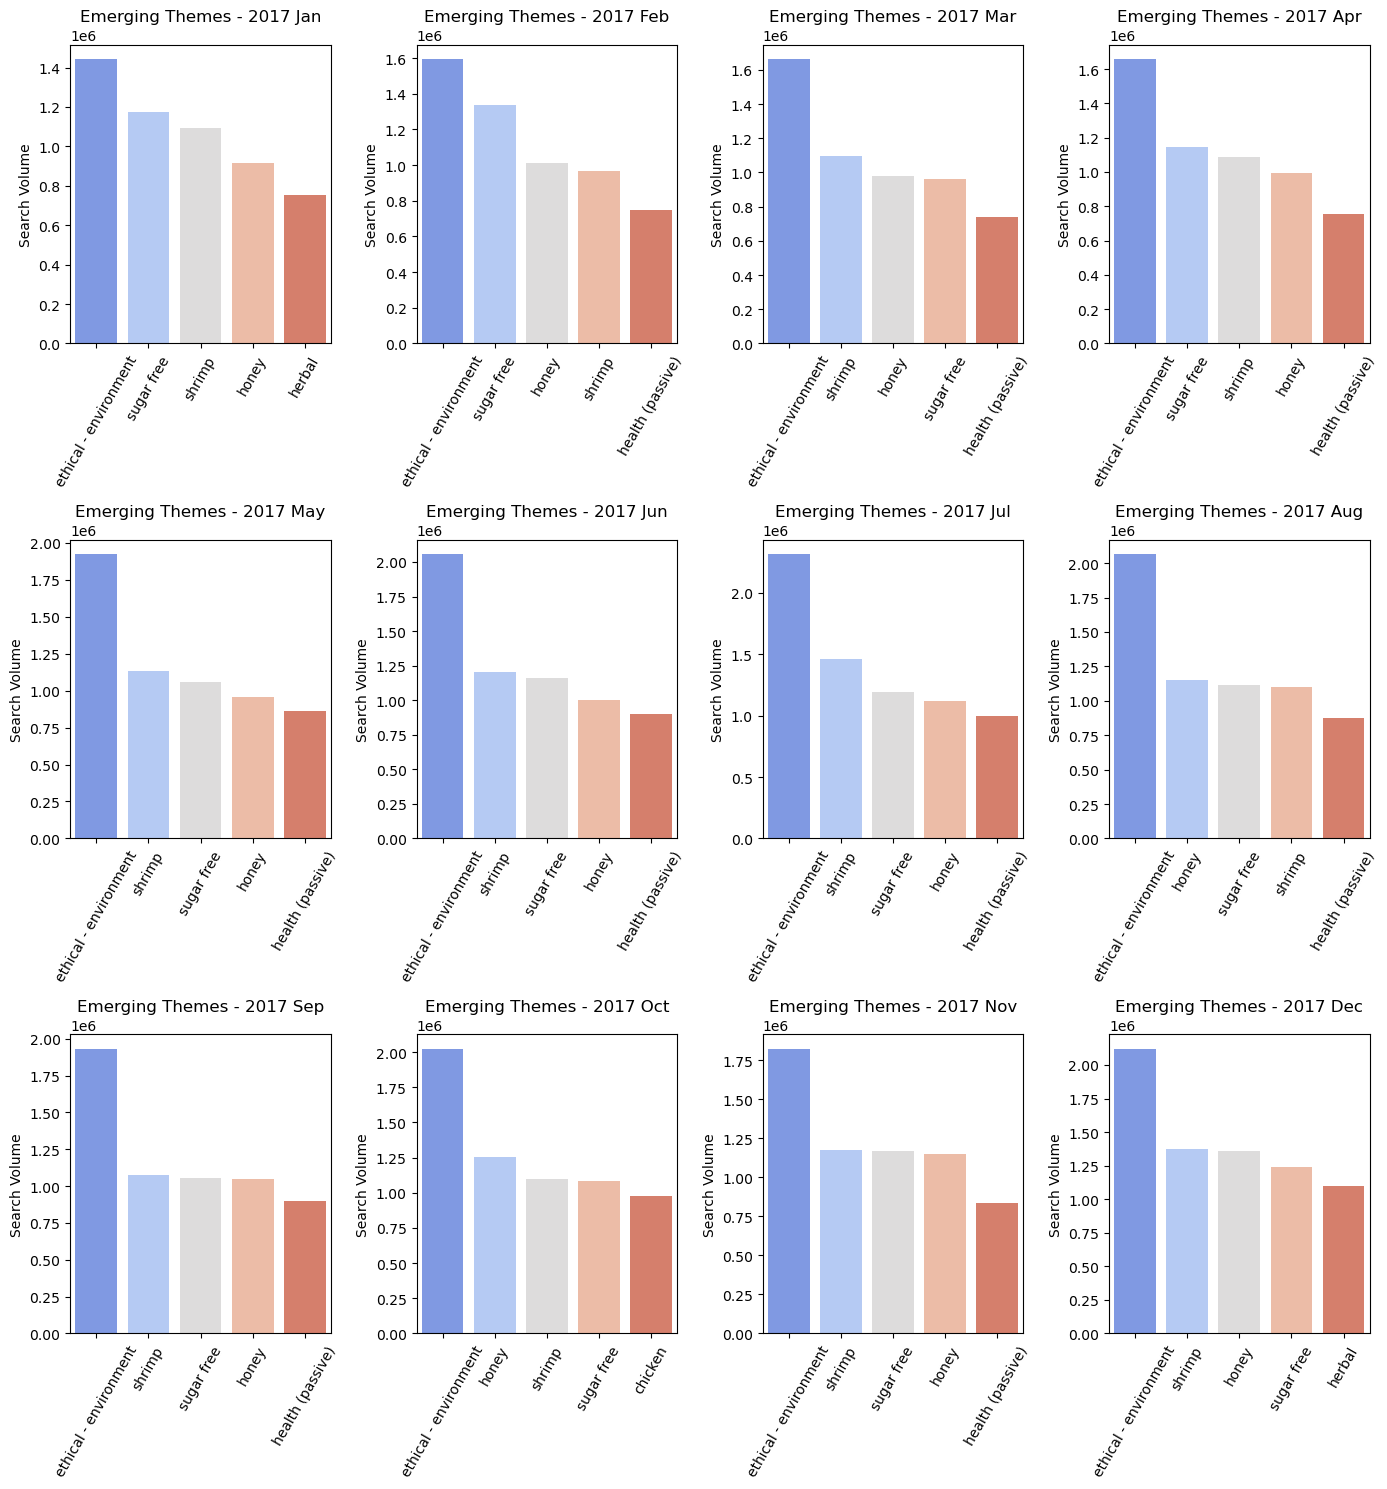

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define list of months with 3-character names in order
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Number of columns per row
cols = 4
rows = (len(months) + 1) // 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()  # Flatten to 1D list for easy indexing

for i, month in enumerate(months):
    ax = axes[i]
    # Get top 5 themes for this month in 2017
    top_monthly = monthly_2017_searched[monthly_2017_searched['month_name'] == month].nlargest(5, 'search_volume')

    # Bar plot
    sns.barplot(x='claim_name', y='search_volume', data=top_monthly, ax=ax, palette='coolwarm')
    ax.set_title(f'Emerging Themes - 2017 {month}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Search Volume')
    ax.tick_params(axis='x', rotation=60)

# Hide unused subplots if months < total grid spots
for j in range(len(months), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


`ethical-environment` , `sugar free` , `shrimp` , `honey` , `health(passive)` are the Emerging themes across all months of 2017

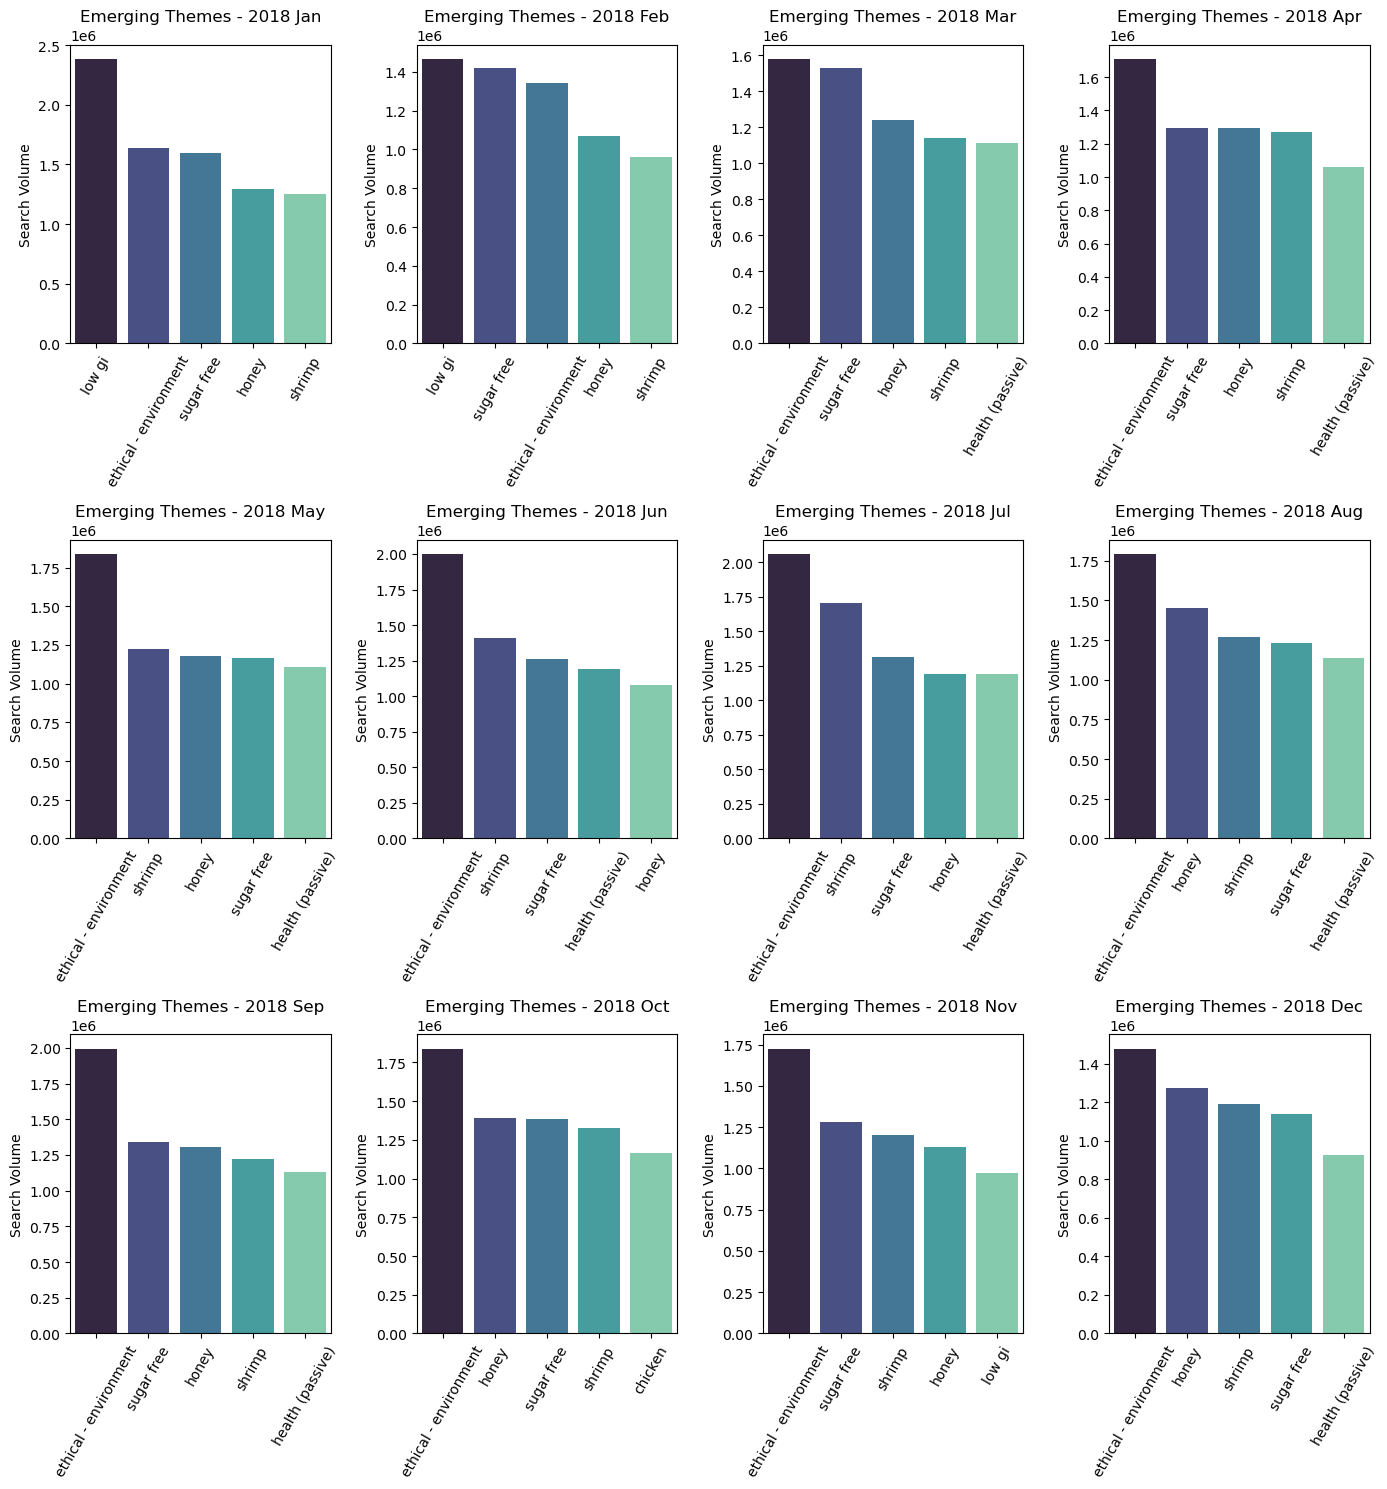

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define months with first 3 characters (ensure this matches your data)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set number of columns and compute required rows
cols = 4
rows = (len(months) + 1) // cols  # Ceiling division for odd counts

# Create subplots grid
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()

# Loop through each month and plot
for i, month in enumerate(months):
    ax = axes[i]
    # Get top 5 claims for this month in 2018
    top_monthly = monthly_2018_searched[monthly_2018_searched['month_name'] == month].nlargest(5, 'search_volume')

    # Bar plot
    sns.barplot(x='claim_name', y='search_volume', data=top_monthly, ax=ax, palette='mako')
    ax.set_title(f'Emerging Themes - 2018 {month}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Search Volume')
    ax.tick_params(axis='x', rotation=60)

# Remove extra axes if any
for j in range(len(months), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


`ethical-environment` ,`low gi` ,  `shrimp` , `honey` are the Emerging themes across all months of 2018

## Emerging themes in Social Media Data

In [52]:
preference_merge_social_media = pd.merge(social_media_data_clean, theme_list_clean, on = 'claim_id' , how='left')

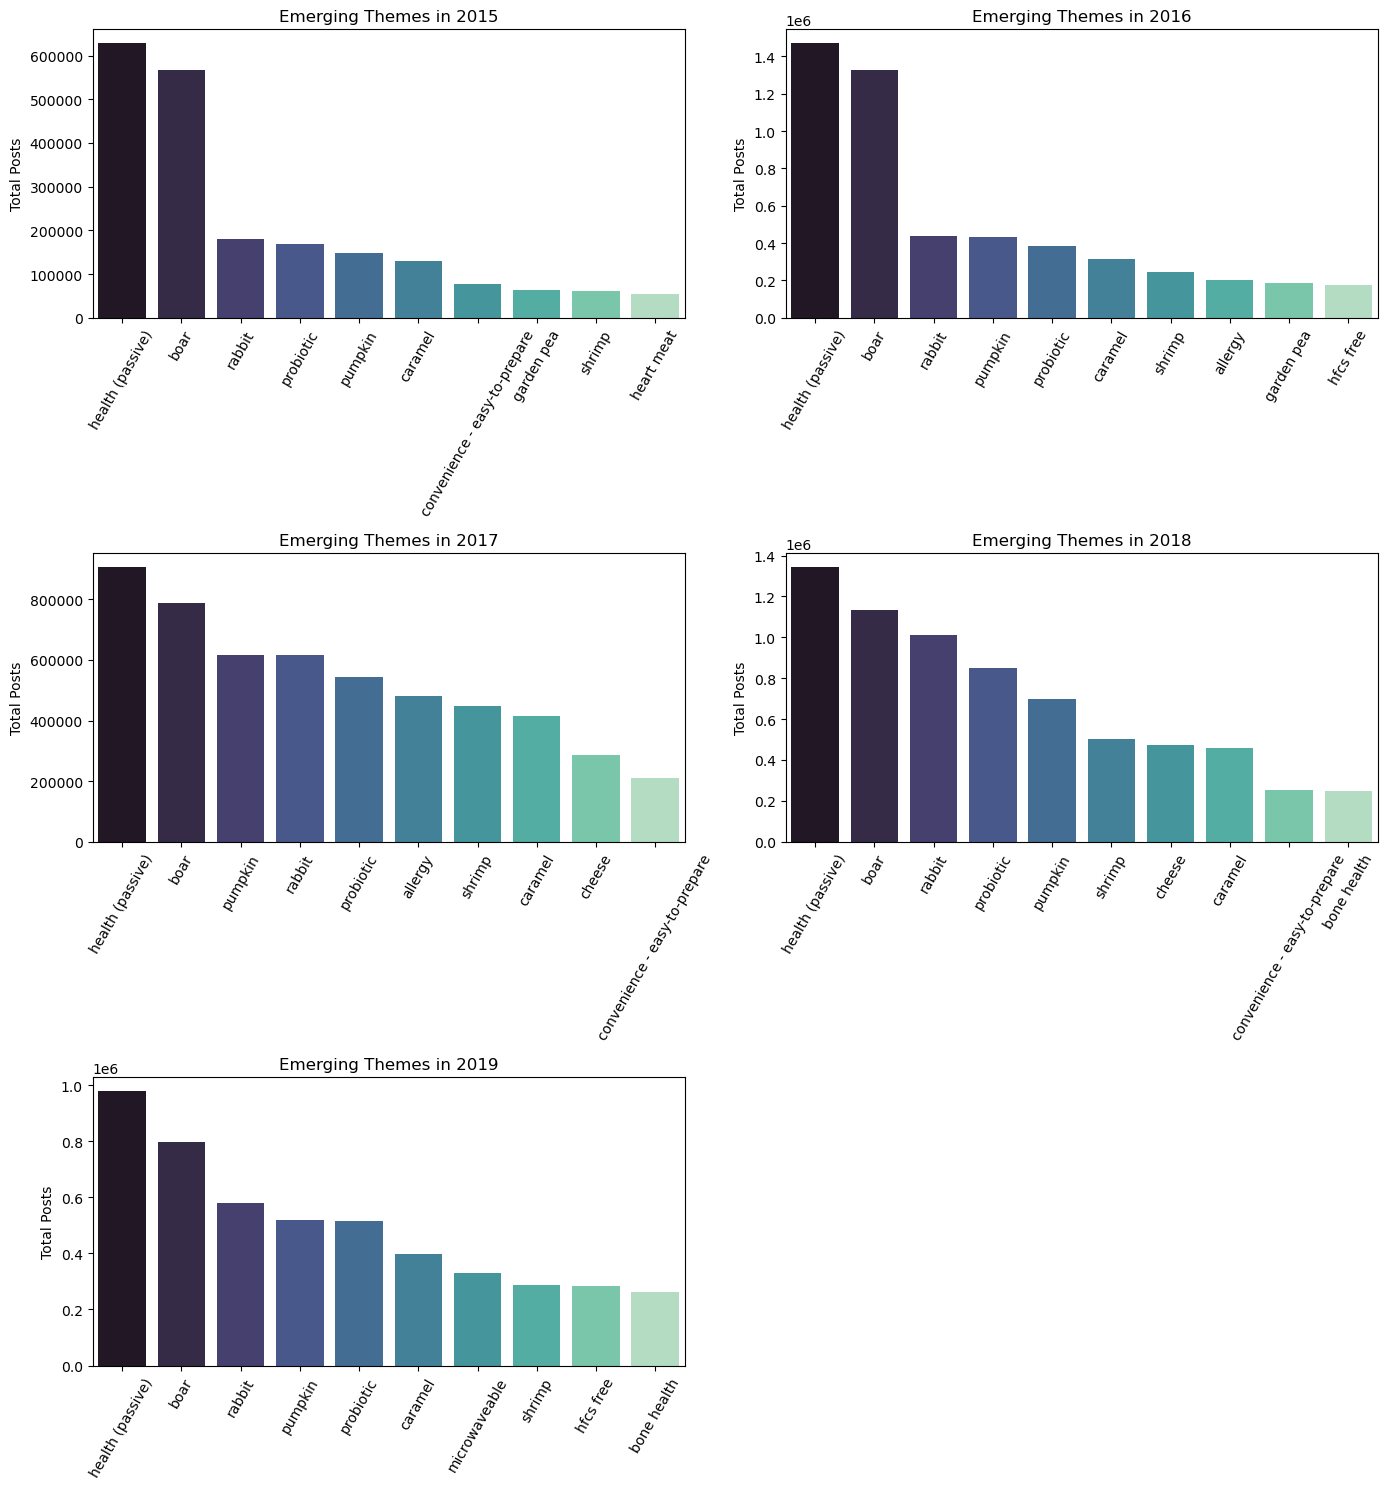

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and sort data by total posts for each year
total_post_yearly = preference_merge_social_media.groupby(['claim_name', 'year'])['total_post'].sum().sort_values(ascending=False).reset_index()

# Get list of unique years
years = sorted(total_post_yearly.year.unique().tolist())

# Set number of columns and compute required rows (2 columns per row)
cols = 2
rows = (len(years) + 1) // cols  # Ceiling division for odd counts

# Create subplots grid
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()

# Loop through each year and plot
for i, year in enumerate(years):
    ax = axes[i]
    # Get top 10 claims for this year
    top_yearly = total_post_yearly[total_post_yearly['year'] == year].nlargest(10, 'total_post')

    # Bar plot
    sns.barplot(x='claim_name', y='total_post', data=top_yearly, ax=ax, palette='mako')
    ax.set_title(f'Emerging Themes in {year}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Total Posts')
    ax.tick_params(axis='x', rotation=60)

# Remove extra axes if any
for j in range(len(years), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [54]:
sales_claim = sales_vendor_claim_name_merge['claim_id'].unique()
filtered_claim_social_media = preference_merge_social_media[preference_merge_social_media['claim_id'].isin(sales_claim)]
unique_themes_post = filtered_claim_social_media["claim_name"].unique().tolist()[:11]

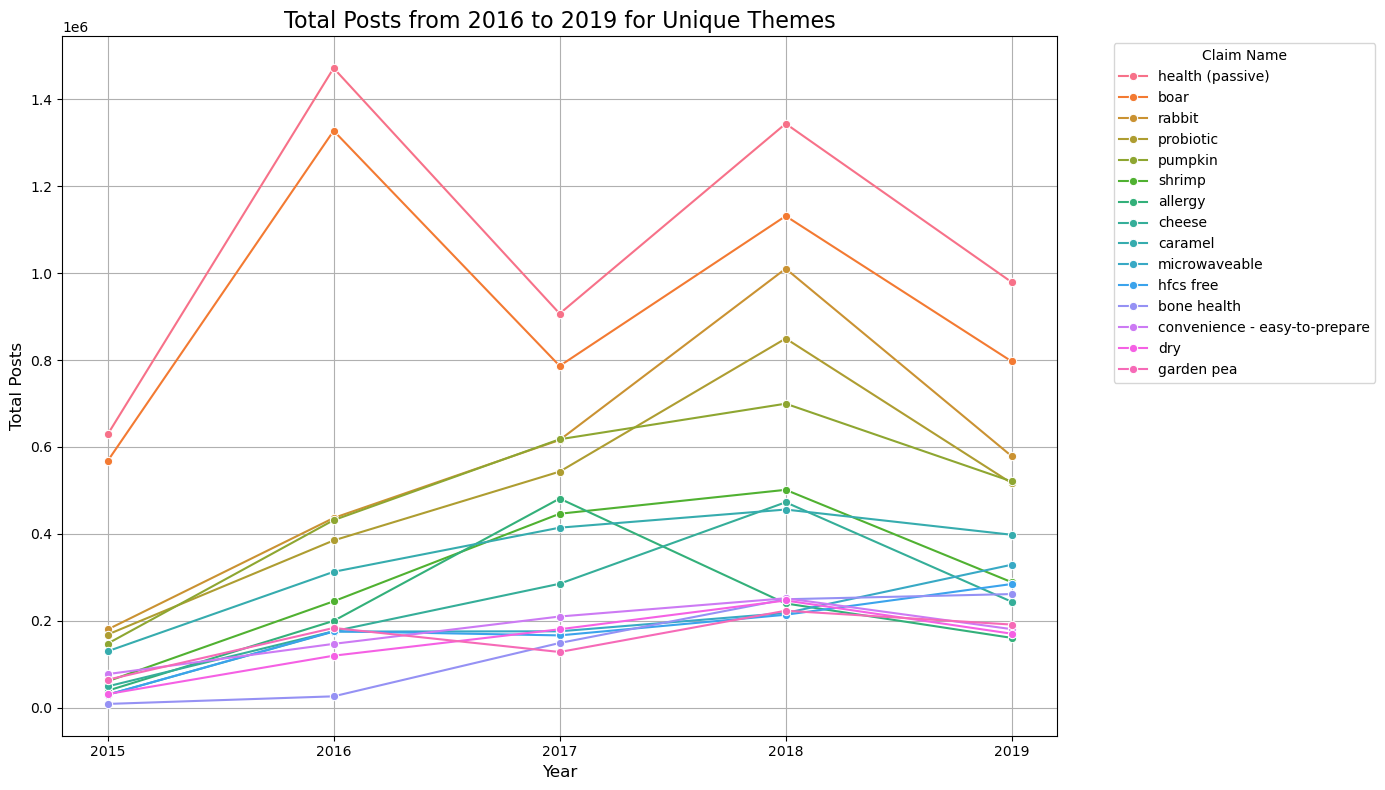

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_themes_post = [
    'allergy', 'boar', 'bone health', 'caramel', 'cheese', 'convenience - easy-to-prepare',
    'dry', 'garden pea', 'health (passive)', 'hfcs free', 'microwaveable', 
    'probiotic', 'pumpkin', 'rabbit', 'shrimp'
]

filtered_data = total_post_yearly[
    (total_post_yearly['claim_name'].isin(unique_themes_post)) & 
    (total_post_yearly['year'].between(2015, 2019))
]
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='year', y='total_post', hue='claim_name', marker='o')

plt.title('Total Posts from 2016 to 2019 for Unique Themes', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Posts', fontsize=12)
plt.legend(title='Claim Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(sorted(filtered_data['year'].unique()), fontsize=10)

plt.tight_layout()

# Display the plot
plt.show()


In [56]:
total_post_monthly = preference_merge_social_media.groupby(['claim_name' , 'year' , 'month_name'])['total_post'].sum().sort_values(ascending = False).reset_index()
monthly_2017_posted = total_post_monthly[total_post_monthly['year']==2017]
monthly_2018_posted = total_post_monthly[total_post_monthly['year']==2018]


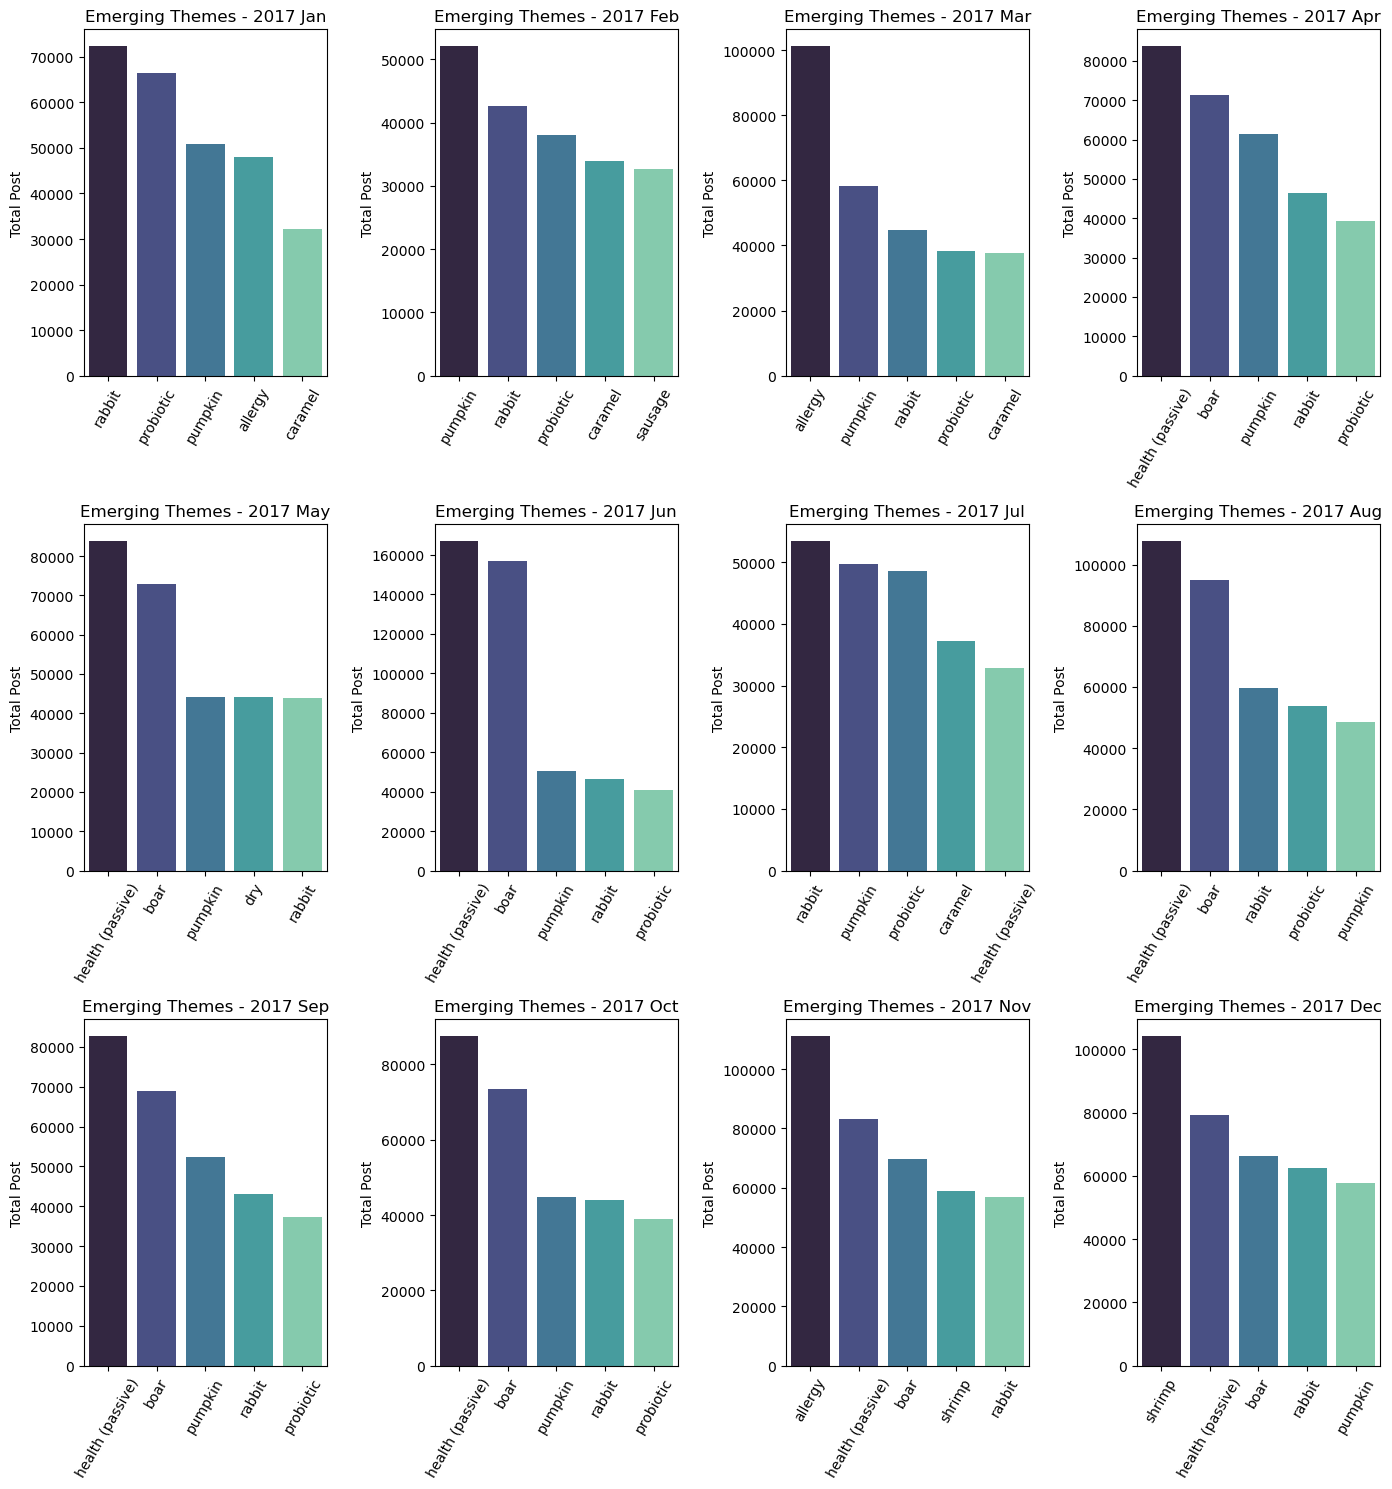

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define months with first 3 characters (ensure this matches your data)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set number of columns and compute required rows
cols = 4
rows = (len(months) + 3) // cols  # Ceiling division for odd counts

# Create subplots grid
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()

# Loop through each month and plot
for i, month in enumerate(months):
    ax = axes[i]
    # Get top 5 claims for this month in 2017
    top_monthly = monthly_2017_posted[monthly_2017_posted['month_name'] == month].nlargest(5, 'total_post')

    # Bar plot
    sns.barplot(x='claim_name', y='total_post', data=top_monthly, ax=ax, palette='mako')
    ax.set_title(f'Emerging Themes - 2017 {month}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Total Post')
    ax.tick_params(axis='x', rotation=60)

# Remove extra axes if any
for j in range(len(months), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In january to june `rabbit` , `allergy`, `health(passive)` were emerging but after that `health(passive)` , `boar`, `cheese` were emerging in 2017.

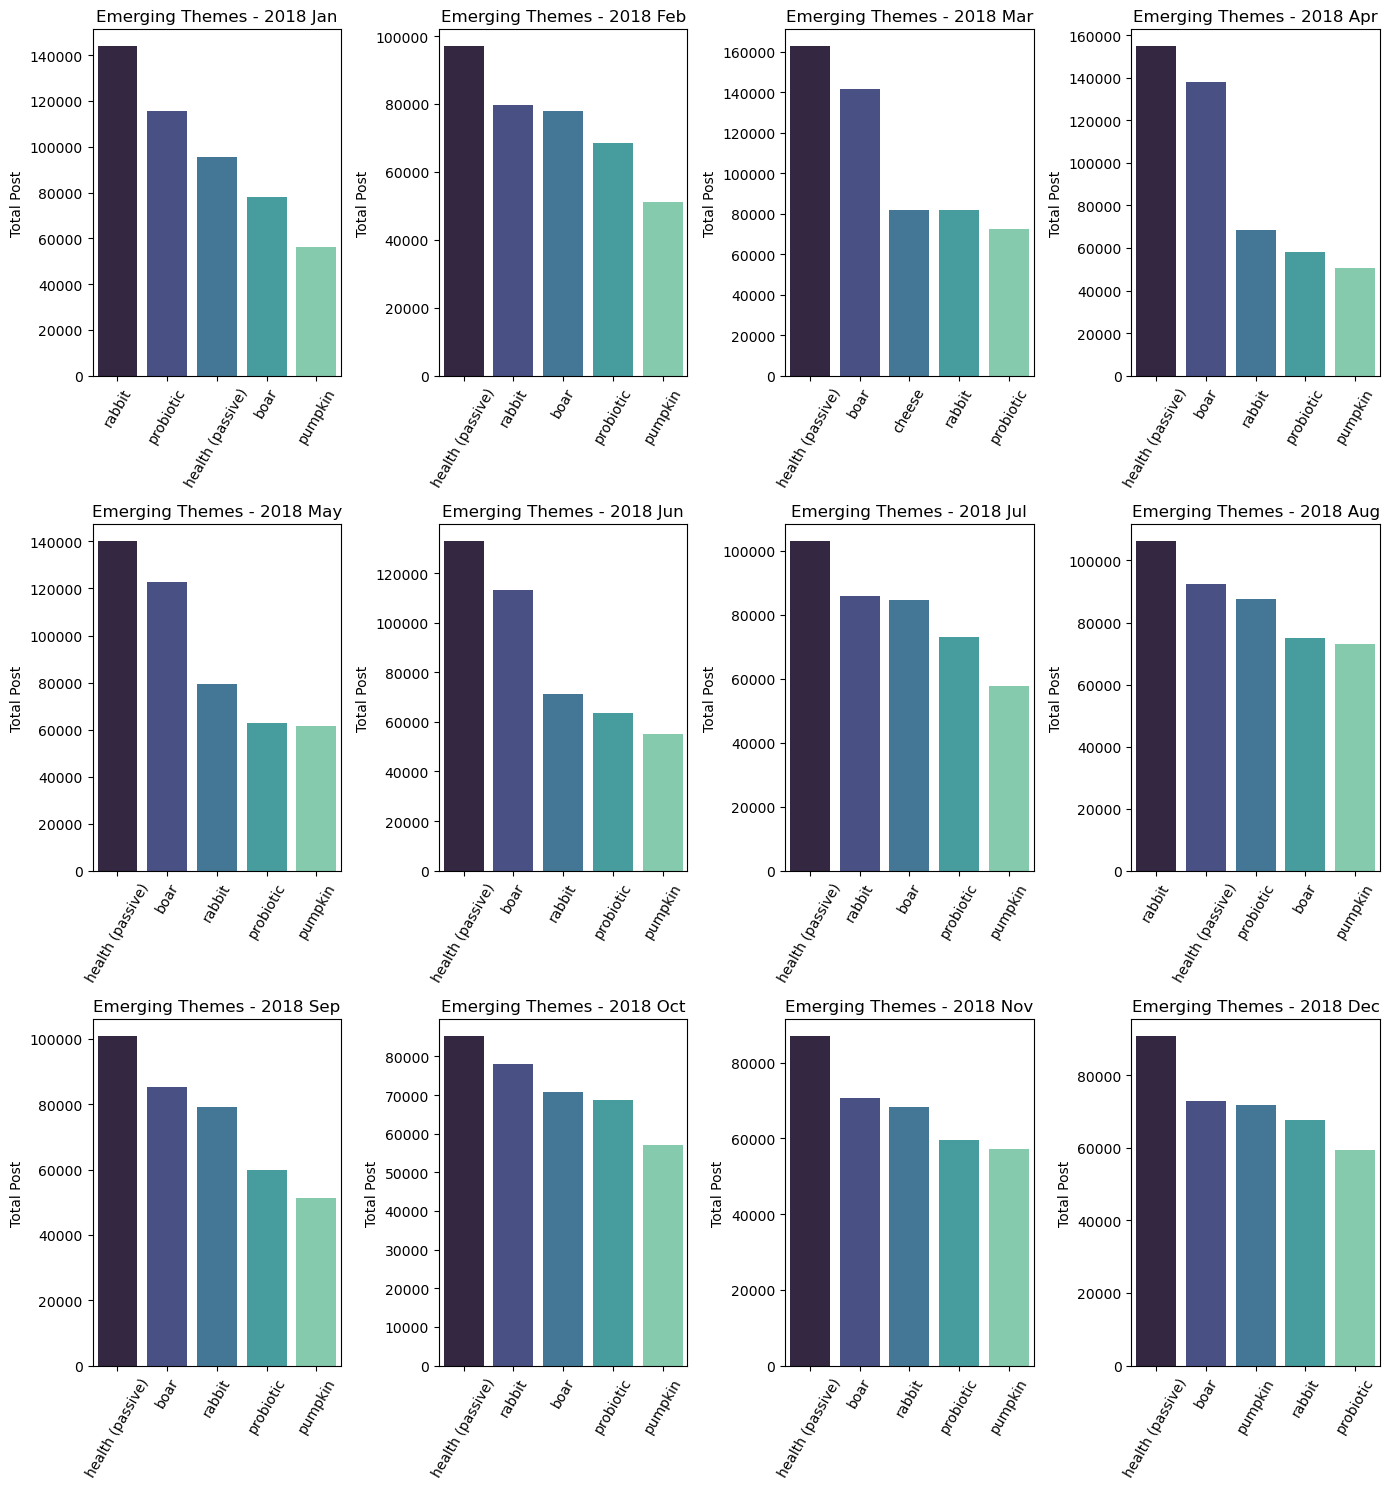

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define months with first 3 characters (ensure this matches your data)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set number of columns and compute required rows
cols = 4
rows = (len(months) + 3) // cols  # Ceiling division for odd counts

# Create subplots grid
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()

# Loop through each month and plot
for i, month in enumerate(months):
    ax = axes[i]
    # Get top 5 claims for this month in 2018
    top_monthly = monthly_2018_posted[monthly_2018_posted['month_name'] == month].nlargest(5, 'total_post')

    # Bar plot
    sns.barplot(x='claim_name', y='total_post', data=top_monthly, ax=ax, palette='mako')
    ax.set_title(f'Emerging Themes - 2018 {month}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Total Post')
    ax.tick_params(axis='x', rotation=60)

# Remove extra axes if any
for j in range(len(months), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


`rabbit` , `boar`, `health(passive)` were emerging in 2018.

## Emerging themes in Sales data

In [59]:
# sales_vendor_claim_name_merge_1 = sales_vendor_claim_name_merge[sales_vendor_claim_name_merge.claim_name!='No Claim']
# sales_vendor_claim_name_merge_1['month_name'] = sales_vendor_claim_name_merge_1['date'].dt.month_name().str[0:3]

In [60]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Calculate total sales yearly for each claim_name and year
# total_sale_yearly = sales_vendor_claim_name_merge_1.groupby(['claim_name', 'year'])['sales_dollars_value'].mean().sort_values(ascending=False).reset_index()

# # Get the unique years
# years = sorted(total_sale_yearly.year.unique().tolist())

# # Set the number of columns and compute required rows
# cols = 2
# rows = (len(years) + 1) // cols  # Ceiling division for odd counts

# # Create a grid of subplots
# fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
# axes = axes.flatten()  # Flatten the 2D axes array to iterate over it easily

# # Loop through each year and plot the data
# for i, year in enumerate(years):
#     ax = axes[i]
#     a = total_sale_yearly[total_sale_yearly['year'] == year][0:10].reset_index()  # Top 10 claims for the year
    
#     # Plotting the barplot for sales data
#     sns.barplot(x='claim_name', y='sales_dollars_value', data=a, ax=ax, palette='mako')
    
#     # Customizing the plot
#     ax.set_title(f'Emerging Themes in Year {year}', fontsize=12)
#     ax.set_xlabel('')
#     ax.set_ylabel('Sales Dollars Value')
#     ax.tick_params(axis='x', rotation=65)

# # Remove extra axes if any
# for j in range(len(years), len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()  # Ensure that the subplots don't overlap
# plt.show()


In [61]:
# total_sale_monthly = sales_vendor_claim_name_merge_1.groupby(['claim_name' , 'year' , 'month_name'])['sales_dollars_value'].mean().sort_values(ascending = False).reset_index()
# total_sale_monthly
# monthly_2017_sold = total_sale_monthly[total_sale_monthly['year']==2017]
# monthly_2018_sold = total_sale_monthly[total_sale_monthly['year']==2018]

In [62]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Define the months with the first 3 characters
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# # Set number of columns and compute required rows
# cols = 4
# rows = (len(months) + 1) // cols  # Ceiling division for odd counts

# # Create a grid of subplots
# fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
# axes = axes.flatten()  # Flatten the 2D axes array to iterate over it easily

# # Loop through each month and plot the data
# for i, month in enumerate(months):
#     ax = axes[i]
    
#     # Filter the data for the current month (Top 5 sold items for 2017)
#     a = monthly_2017_sold[monthly_2017_sold['month_name'] == month][0:5].reset_index()
    
#     # Create the barplot
#     sns.barplot(x='claim_name', y='sales_dollars_value', data=a, ax=ax, palette='mako')
    
#     # Customize the plot
#     ax.set_title(f'Emerging Themes in {month} 2017', fontsize=12)
#     ax.set_xlabel('')
#     ax.set_ylabel('Sales Dollars Value')
#     ax.tick_params(axis='x', rotation=65)

# # Remove extra axes if any (if months are fewer than total subplots)
# for j in range(len(months), len(axes)):
#     fig.delaxes(axes[j])

# # Adjust the layout to prevent overlapping
# plt.tight_layout()

# # Display the plot
# plt.show()


`low calorie` , `soy foods` , `stroganoff` were emerging themes in  all months 2017

In [63]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Define the months with the first 3 characters
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# # Set number of columns and compute required rows
# cols = 4
# rows = (len(months) + 1) // cols  # Ceiling division for odd counts

# # Create a grid of subplots
# fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
# axes = axes.flatten()  # Flatten the 2D axes array to iterate over it easily

# # Loop through each month and plot the data
# for i, month in enumerate(months):
#     ax = axes[i]
    
#     # Filter the data for the current month (Top 5 sold items for 2018)
#     a = monthly_2018_sold[monthly_2018_sold['month_name'] == month][0:5].reset_index()
    
#     # Create the barplot
#     sns.barplot(x='claim_name', y='sales_dollars_value', data=a, ax=ax, palette='mako')
    
#     # Customize the plot
#     ax.set_title(f'Emerging Themes in {month} 2018', fontsize=12)
#     ax.set_xlabel('')
#     ax.set_ylabel('Sales Dollars Value')
#     ax.tick_params(axis='x', rotation=65)

# # Remove extra axes if any (if months are fewer than total subplots)
# for j in range(len(months), len(axes)):
#     fig.delaxes(axes[j])

# # Adjust the layout to prevent overlapping
# plt.tight_layout()

# # Display the plot
# plt.show()


`low calorie` , `soy foods` , `stroganoff` , 'salmon' were emerging themes in  all months 2017

## Merging Datasets

we will merge all the tables on `claim_id` , `claim_name` , `year` , `week_numbers` , 

In [16]:
google_weekly = google_search_data_clean.groupby(['claim_id','week_number','year'])['search_volume'].sum().reset_index().sort_values(by=['week_number','year'] ,ascending = [True,True])

In [17]:
social_media_weekly = social_media_data_clean.groupby(['claim_id','week_number','year'])['total_post'].sum().reset_index().sort_values(by=['week_number','year'] ,ascending = [True,True])

In [18]:
sales_weekly = sales_data_clean.groupby(['product_id', 'week_number', 'year', 'date'])[
    ['sales_dollars_value', 'sales_units_value', 'sales_lbs_value']
].sum().reset_index().sort_values(by=['week_number', 'year'], ascending=[True, True])


In [19]:
print(google_weekly.shape)
print(social_media_weekly.shape)
print(sales_weekly.shape)

(28621, 4)
(47784, 4)
(4526182, 7)


In [20]:
google_weekly.head(15)

claim_id  week_number  year  search_volume
0            8            1  2014          30648
302         39            1  2014            363
776         75            1  2014           3101
1103        81            1  2014           5925
1404       100            1  2014           9225
1982       142            1  2014             21
2095       148            1  2014           1710
2376       151            1  2014           4056
2678       152            1  2014           9816
2980       158            1  2014          84570
3282       163            1  2014              8
3699       177            1  2014          12076
4001       187            1  2014          13797
4846       207            1  2014           3098
5235       227            1  2014           2549

In [21]:
social_media_weekly.head(15)

claim_id  week_number  year  total_post
0            8            1  2016        1922
248         15            1  2016          22
495         26            1  2016           4
743         38            1  2016          16
991         39            1  2016          13
1239        40            1  2016          30
1487        65            1  2016          80
1735        75            1  2016         256
1982        79            1  2016           3
2230        81            1  2016         451
2478       100            1  2016          31
2726       101            1  2016           1
2974       120            1  2016          44
3222       125            1  2016         599
3470       138            1  2016           0

In [22]:
sales_claim_merge = pd.merge(sales_weekly, theme_product_list_clean, on=['product_id'], how= 'inner')
sales_claim_merge.shape

(7767420, 8)

In [23]:
google_social_merge = google_weekly.merge(social_media_weekly, left_on=['claim_id','week_number','year'], right_on=['claim_id','week_number','year'], how= 'outer')
google_social_merge.fillna(0, inplace = True)
google_social_merge.shape

(53049, 5)

In [24]:
# # sales_claim_merge.merge(google_social_merge, left_on=['Claim_ID','week','year'], right_on=['Claim_ID','week','year'], how= 'outer')
merge_abc = sales_claim_merge.merge(google_social_merge, left_on=['claim_id','week_number','year'], right_on=['claim_id','week_number','year'], how= 'outer')
merge_info(sales_claim_merge,google_social_merge, merge_abc)

n_cols   n_rows
left_df         8  7767420
right_df        5    53049
merged_df      10  7813701

In [25]:
# import pandas as pd
# import gc
# import os
# import shutil

# # Output folder to store chunked merged files
# merge_output_dir = "safe_merged_chunks"
# os.makedirs(merge_output_dir, exist_ok=True)

# # Get unique (year, claim_id) combinations
# pairs = sales_claim_merge[['year', 'claim_id']].dropna().drop_duplicates()

# # Set index on google_social_merge for faster filtering
# google_social_merge.set_index(['year', 'claim_id'], inplace=True)

# # Loop through each (year, claim_id) pair
# for _, row in pairs.iterrows():
#     year = int(row['year'])
#     claim_id = int(row['claim_id'])

#     # Filter relevant part of sales_claim_merge
#     sales_chunk = sales_claim_merge[
#         (sales_claim_merge['year'] == year) &
#         (sales_claim_merge['claim_id'] == claim_id)
#     ]

#     # Filter relevant part of google_social_merge
#     try:
#         google_chunk = google_social_merge.loc[(year, claim_id)].reset_index()
#     except KeyError:
#         google_chunk = pd.DataFrame(columns=['claim_id', 'week_number', 'year'])  # No match

#     # Perform the merge
#     merged_chunk = pd.merge(
#         sales_chunk,
#         google_chunk,
#         on=['claim_id', 'week_number', 'year'],
#         how='outer'
#     )

#     # Save merged chunk to disk
#     output_file = f"{merge_output_dir}/merged_claim_{claim_id}_year_{year}.parquet"
#     merged_chunk.to_parquet(output_file, index=False)
#     # print(f"Merged: claim {claim_id}, year {year} ➜ saved to {output_file}")

#     # Cleanup
#     del sales_chunk, google_chunk, merged_chunk
#     gc.collect()

# # Reset index back
# google_social_merge.reset_index(inplace=True)

# # Concatenate all saved chunks to get final merge_abc
# merged_files = sorted([
#     os.path.join(merge_output_dir, f)
#     for f in os.listdir(merge_output_dir)
#     if f.endswith(".parquet")
# ])

# merge_abc = pd.concat([pd.read_parquet(f) for f in merged_files], ignore_index=True)
# print("Full outer merge complete. Final shape:", merge_abc.shape)

# # Optional: clean up the temporary folder
# shutil.rmtree(merge_output_dir)
# print("Temporary merged chunks folder deleted.")


- We observed that in some rows , sales dollar value was non-zero, but sales weight in lbs was 0, we assume that the value maybe less than 0.5 lbs, so gave the round figure as 0, we will replace those 0 by 0.5 , for our calculation, and it will throw , minimum error.

In [26]:
# # merge_abc['sales_lbs_value']= np.where(merge_abc['sales_lbs_value'] == 0,0.5,merge_abc['sales_lbs_value'])
# import pandas as pd
# import numpy as np
# import os
# import gc

# # Output folder to store safe updated chunks
# fixed_output_dir = "sales_lbs_fixed_chunks"
# os.makedirs(fixed_output_dir, exist_ok=True)

# # Break merge_abc into chunks and update safely
# chunk_size = 500_000  # You can tune this depending on memory
# num_chunks = len(merge_abc) // chunk_size + 1

# for i in range(num_chunks):
#     start = i * chunk_size
#     end = min(start + chunk_size, len(merge_abc))

#     chunk = merge_abc.iloc[start:end].copy()

#     # Safely replace 0 with 0.5 in sales_lbs_value
#     chunk.loc[chunk['sales_lbs_value'] == 0, 'sales_lbs_value'] = 0.5

#     # Save the chunk to disk
#     chunk_path = f"{fixed_output_dir}/chunk_{i}.parquet"
#     chunk.to_parquet(chunk_path, index=False)

#     # print(f"Fixed and saved chunk {i+1}/{num_chunks}: {chunk_path}")

#     # Clean up
#     del chunk
#     gc.collect()

# # Read fixed chunks back into a final DataFrame
# fixed_chunks = [
#     pd.read_parquet(os.path.join(fixed_output_dir, f))
#     for f in sorted(os.listdir(fixed_output_dir))
#     if f.endswith(".parquet")
# ]
# merge_abc_fixed = pd.concat(fixed_chunks, ignore_index=True)
# print("sales_lbs_value fix complete. Final shape:", merge_abc_fixed.shape)

# # Optional cleanup
# shutil.rmtree(fixed_output_dir)
# print("Cleaned up temporary fixed chunks.")


In [27]:
merge_abc['sales_lbs_value']= np.where(merge_abc['sales_lbs_value'] == 0,0.5,merge_abc['sales_lbs_value'])

Some sales dollar value is 0 , we can remove them , for ease of analysis.

In [28]:
merge_abc = merge_abc[merge_abc['sales_dollars_value']!=0.0]

In [29]:
merge_abc.head()

product_id  week_number  year       date  sales_dollars_value  \
0         1.0            1  2016 2016-01-09              13927.0   
1         3.0            1  2016 2016-01-09              10289.0   
2         4.0            1  2016 2016-01-09                357.0   
3         6.0            1  2016 2016-01-09              23113.0   
4         7.0            1  2016 2016-01-09              23177.0   

   sales_units_value  sales_lbs_value  claim_id  search_volume  total_post  
0              934.0          18680.0         0            NaN         NaN  
1             1592.0          28646.0         0            NaN         NaN  
2               22.0            440.0         0            NaN         NaN  
3             2027.0          81088.0         0            NaN         NaN  
4             3231.0          58164.0         0            NaN         NaN

## Adding features

In [30]:
merge_abc['per_unit_value'] = merge_abc['sales_dollars_value'] / merge_abc['sales_units_value']
merge_abc['per_lbs_value'] = merge_abc['sales_dollars_value'] / merge_abc['sales_lbs_value']
merge_abc['per_unit_weight_lbs'] = merge_abc['sales_lbs_value'] / merge_abc['sales_units_value']

## Hypothesis Validation

In [31]:
Claim_abc = merge_abc.groupby(['claim_id','week_number','year', 'date']).agg({'sales_dollars_value':'sum','sales_units_value':'sum','sales_lbs_value':'sum','search_volume':'sum','total_post':'sum'}).reset_index()
Claim_abc = pd.merge(Claim_abc , theme_list_clean , on = 'claim_id', how = 'left')

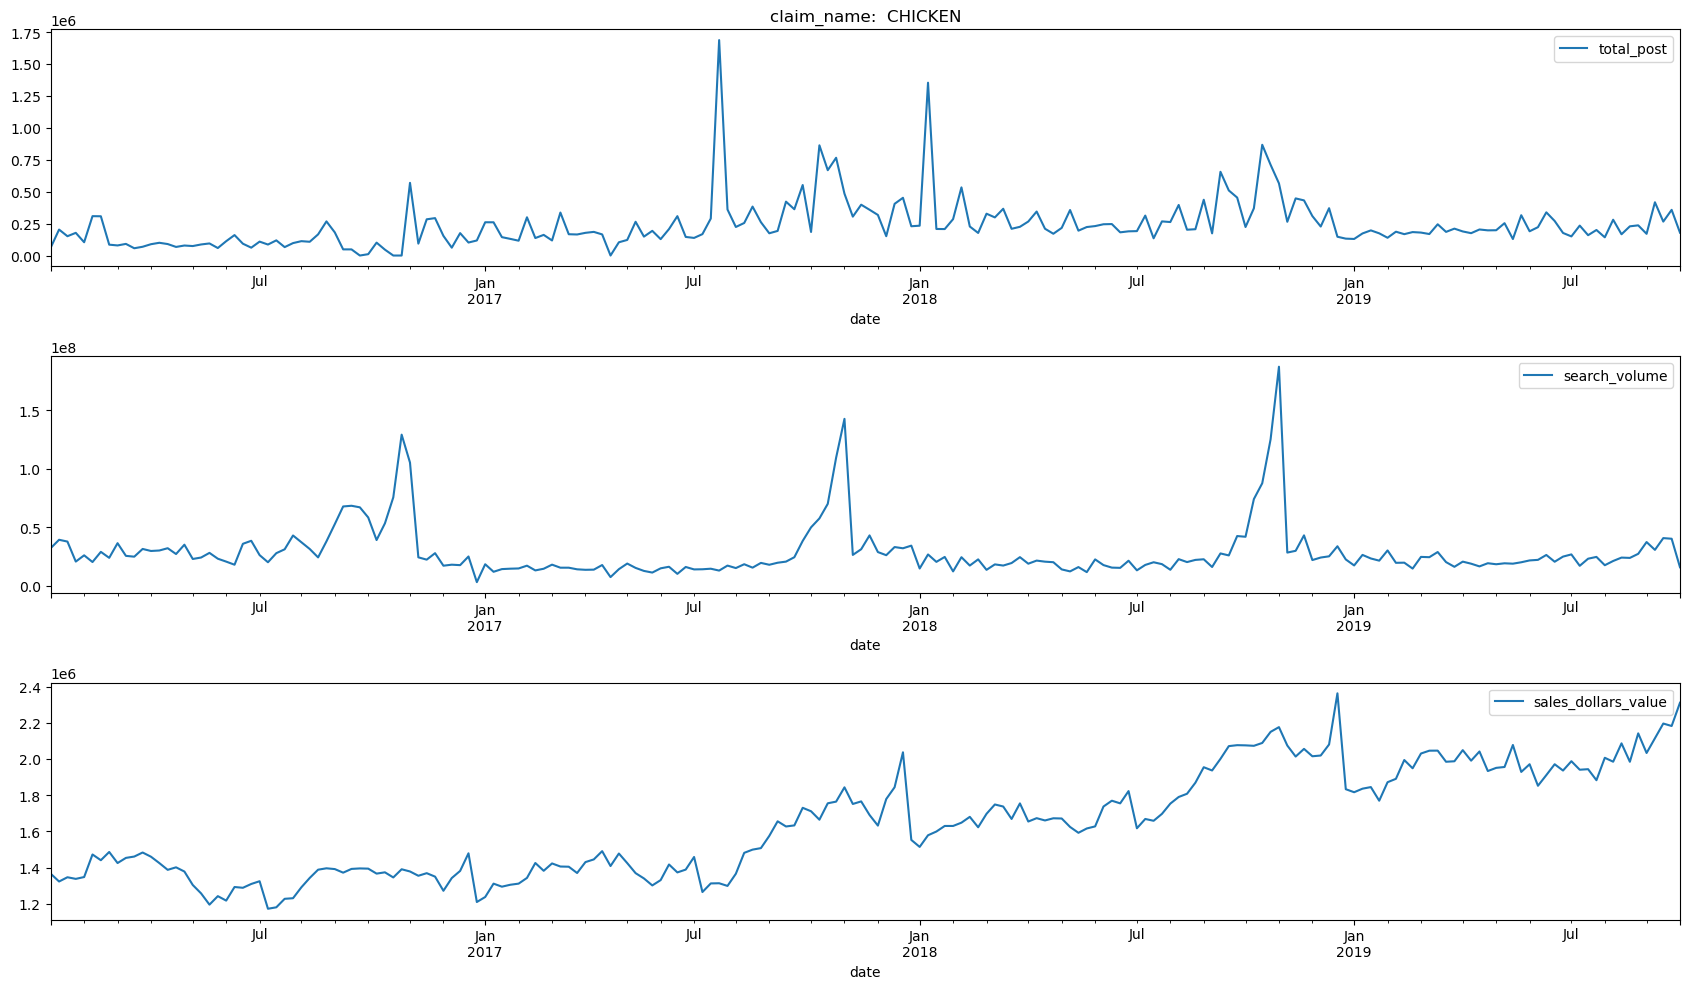

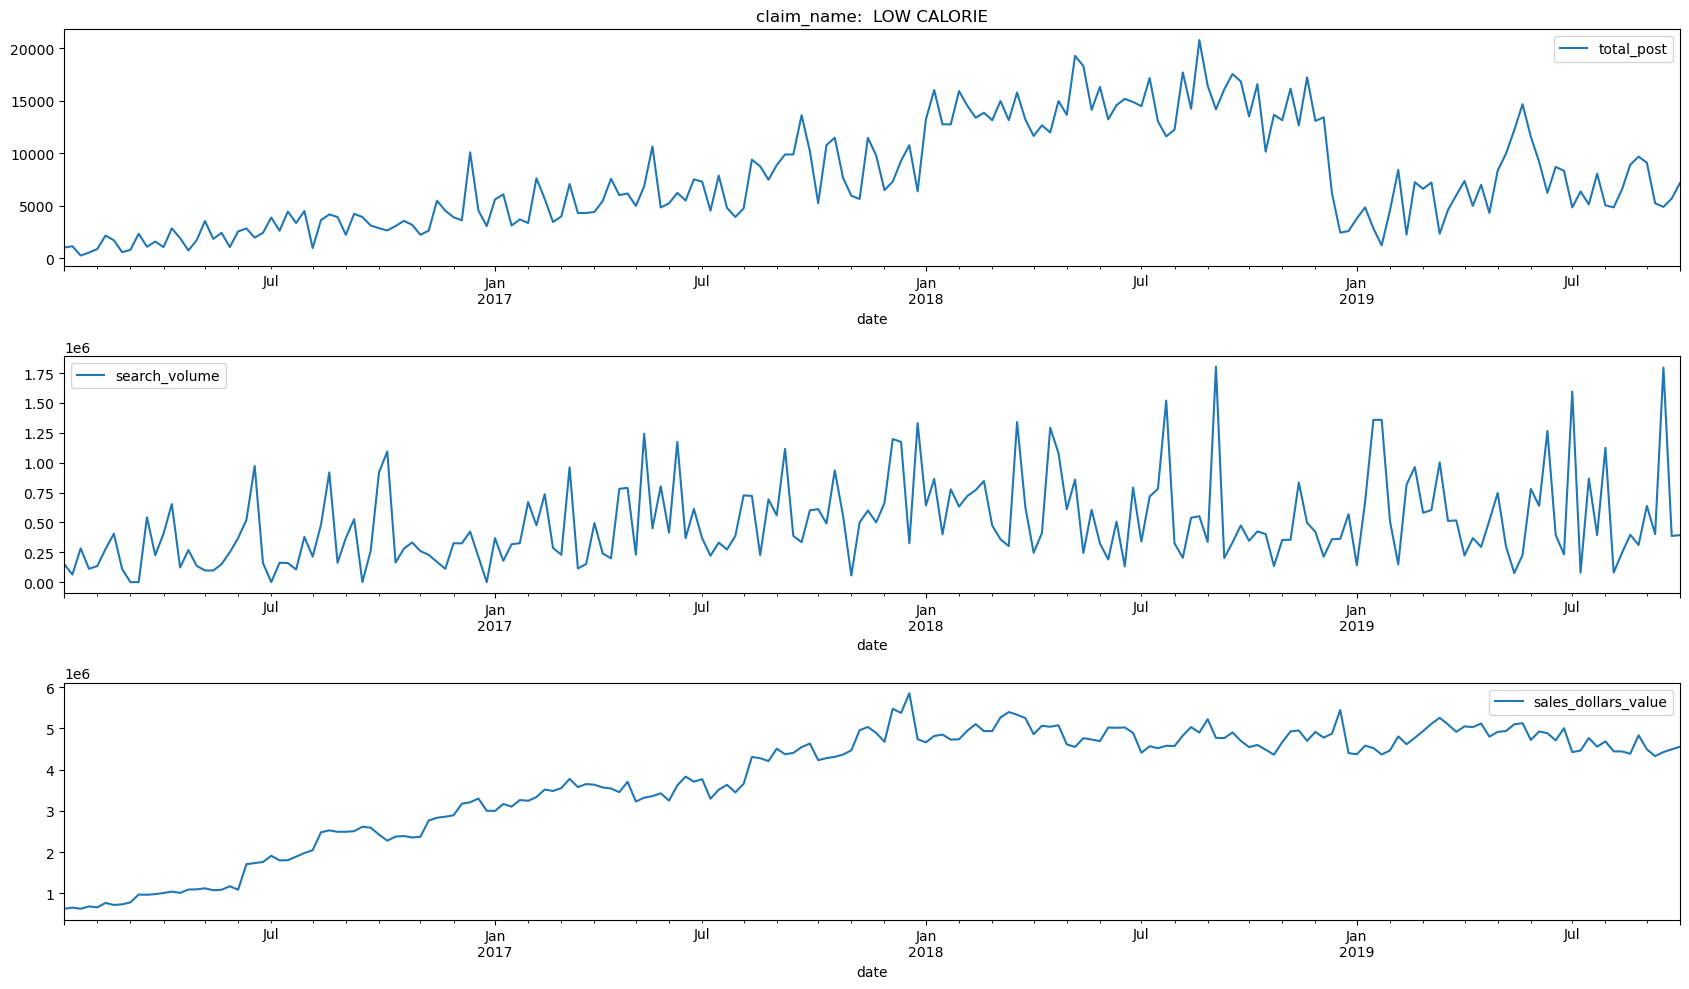

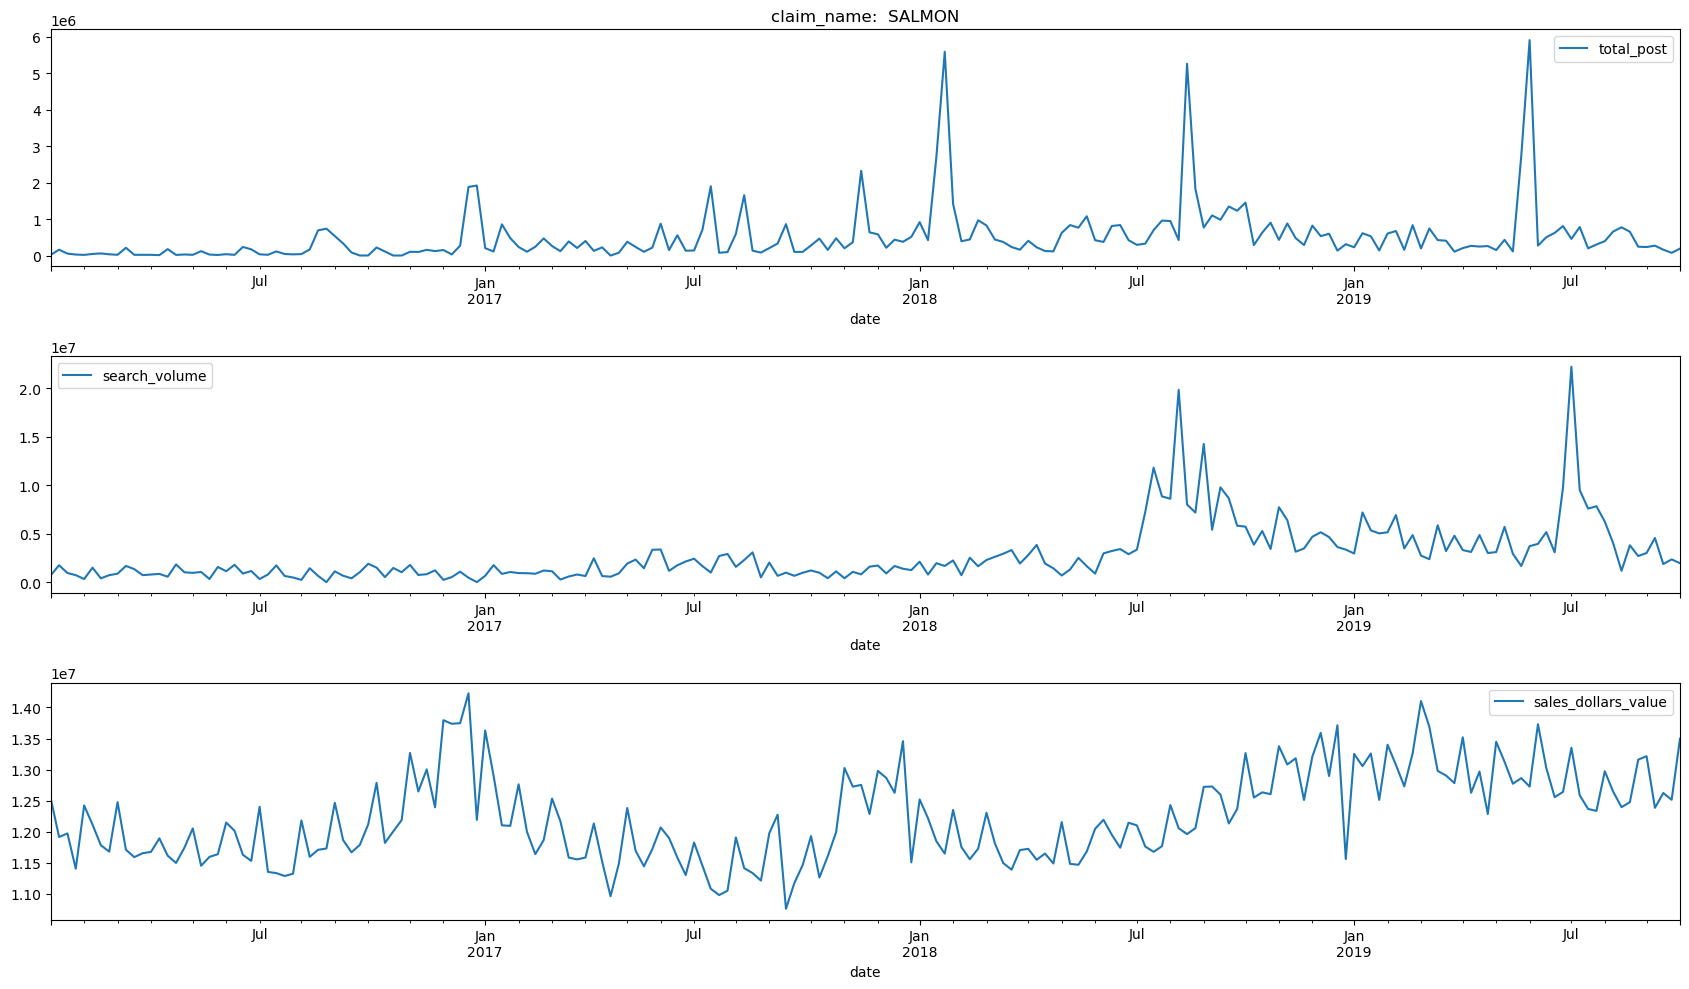

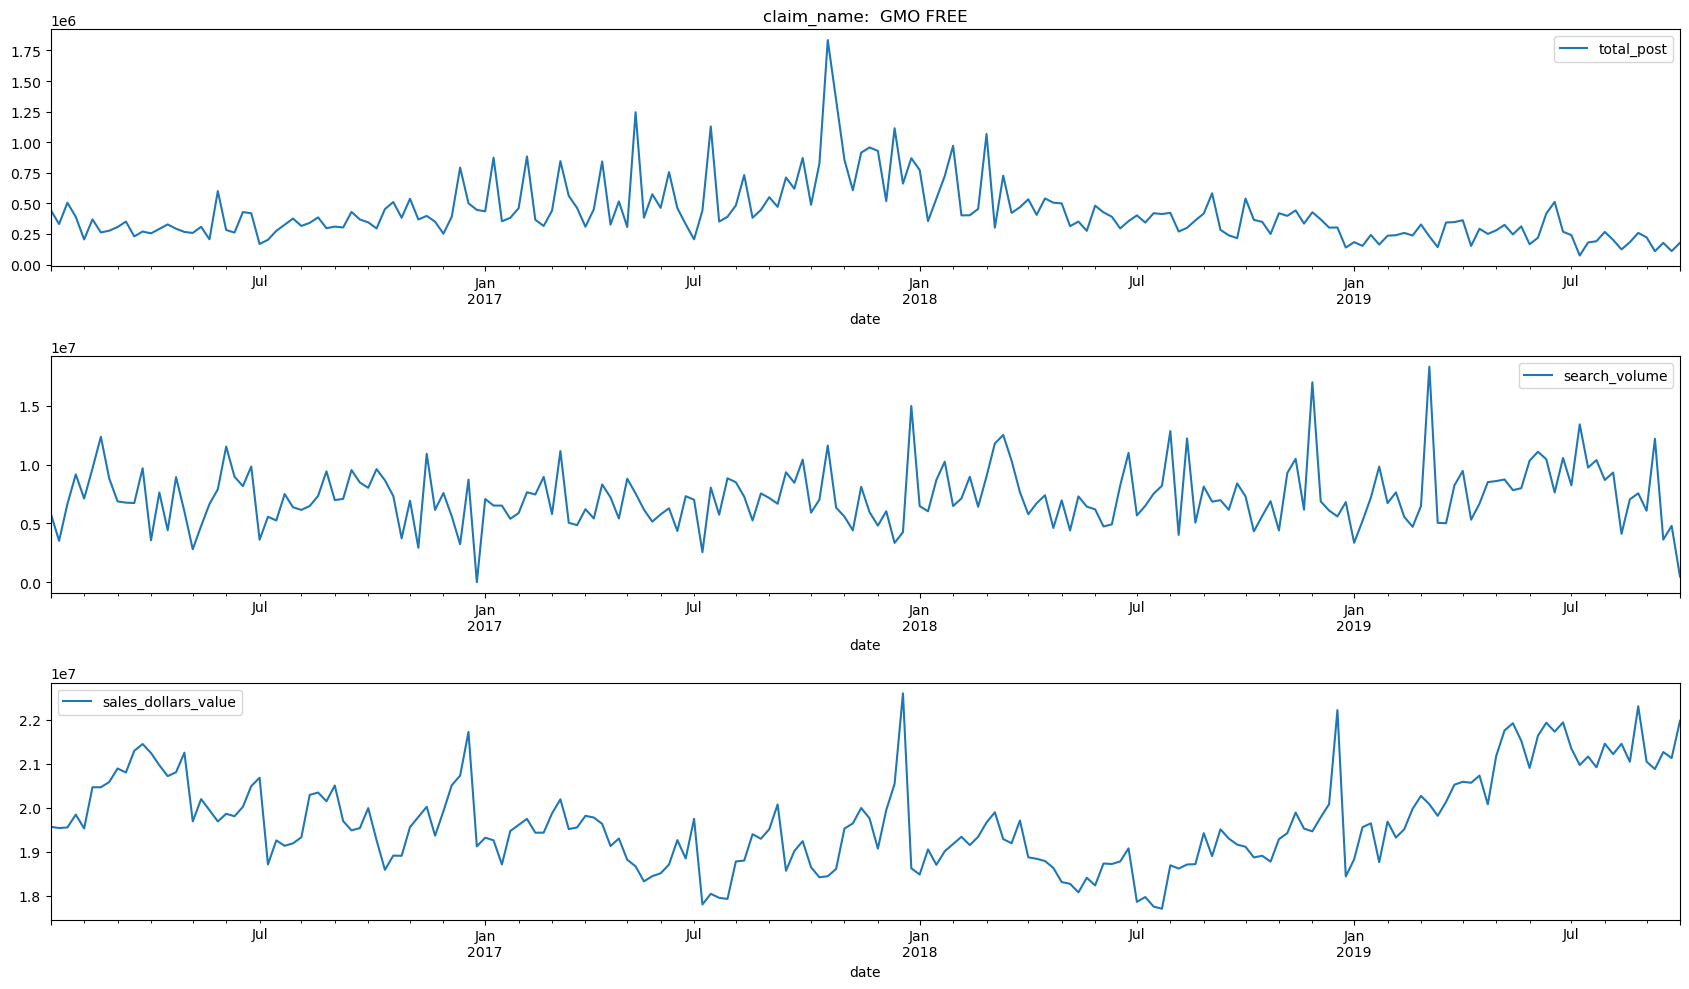

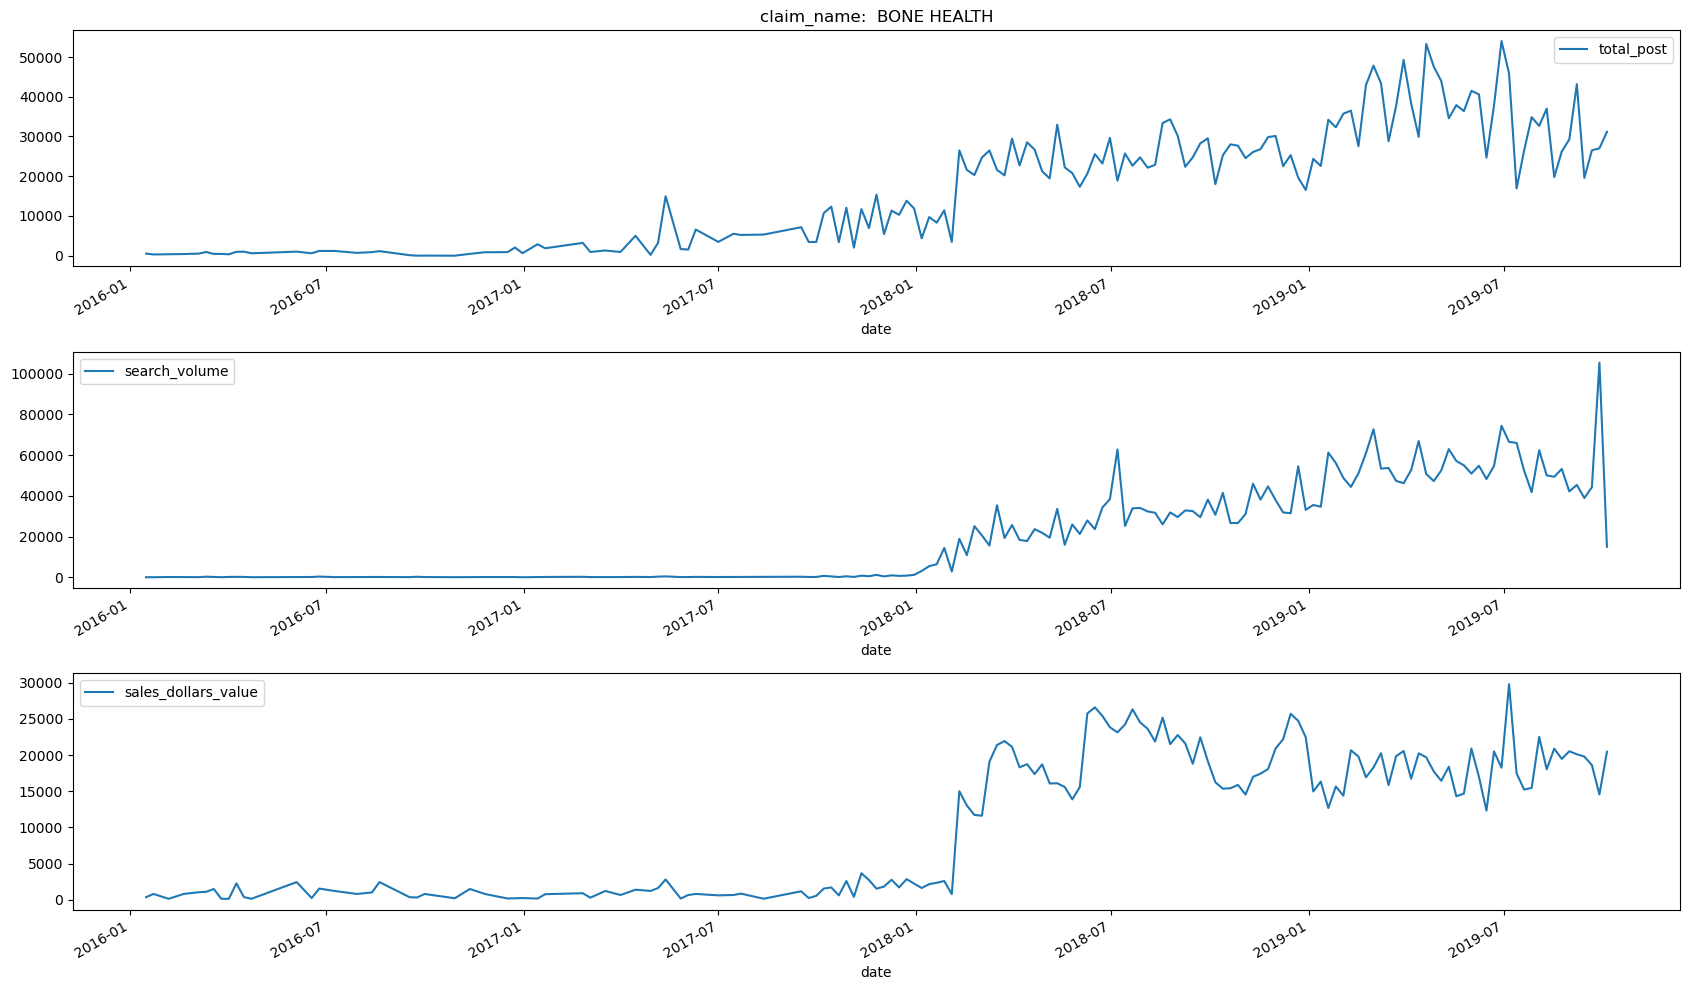

In [32]:
claim_name_list = ['chicken' , 'low calorie' , 'soy foods' , 'salmon' , 'ethnic & exotic' , 'gmo free' ,'bone health' ]
for name in claim_name_list:
    fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(17,10))
    Claim_abc[(Claim_abc['claim_name']== name)].sort_values(by=['date'],ascending=[True]).plot(x='date',y='total_post',ax=ax[0],kind='line')
    ax[0].set_title("claim_name:  " + str(name).upper())
    Claim_abc[(Claim_abc['claim_name']==name)].sort_values(by=['date'],ascending=[True]).plot(x='date',y='search_volume',ax=ax[1],kind='line')
    Claim_abc[(Claim_abc['claim_name']==name)].sort_values(by=['date'],ascending=[True]).plot(x='date',y='sales_dollars_value',ax=ax[2],kind='line')

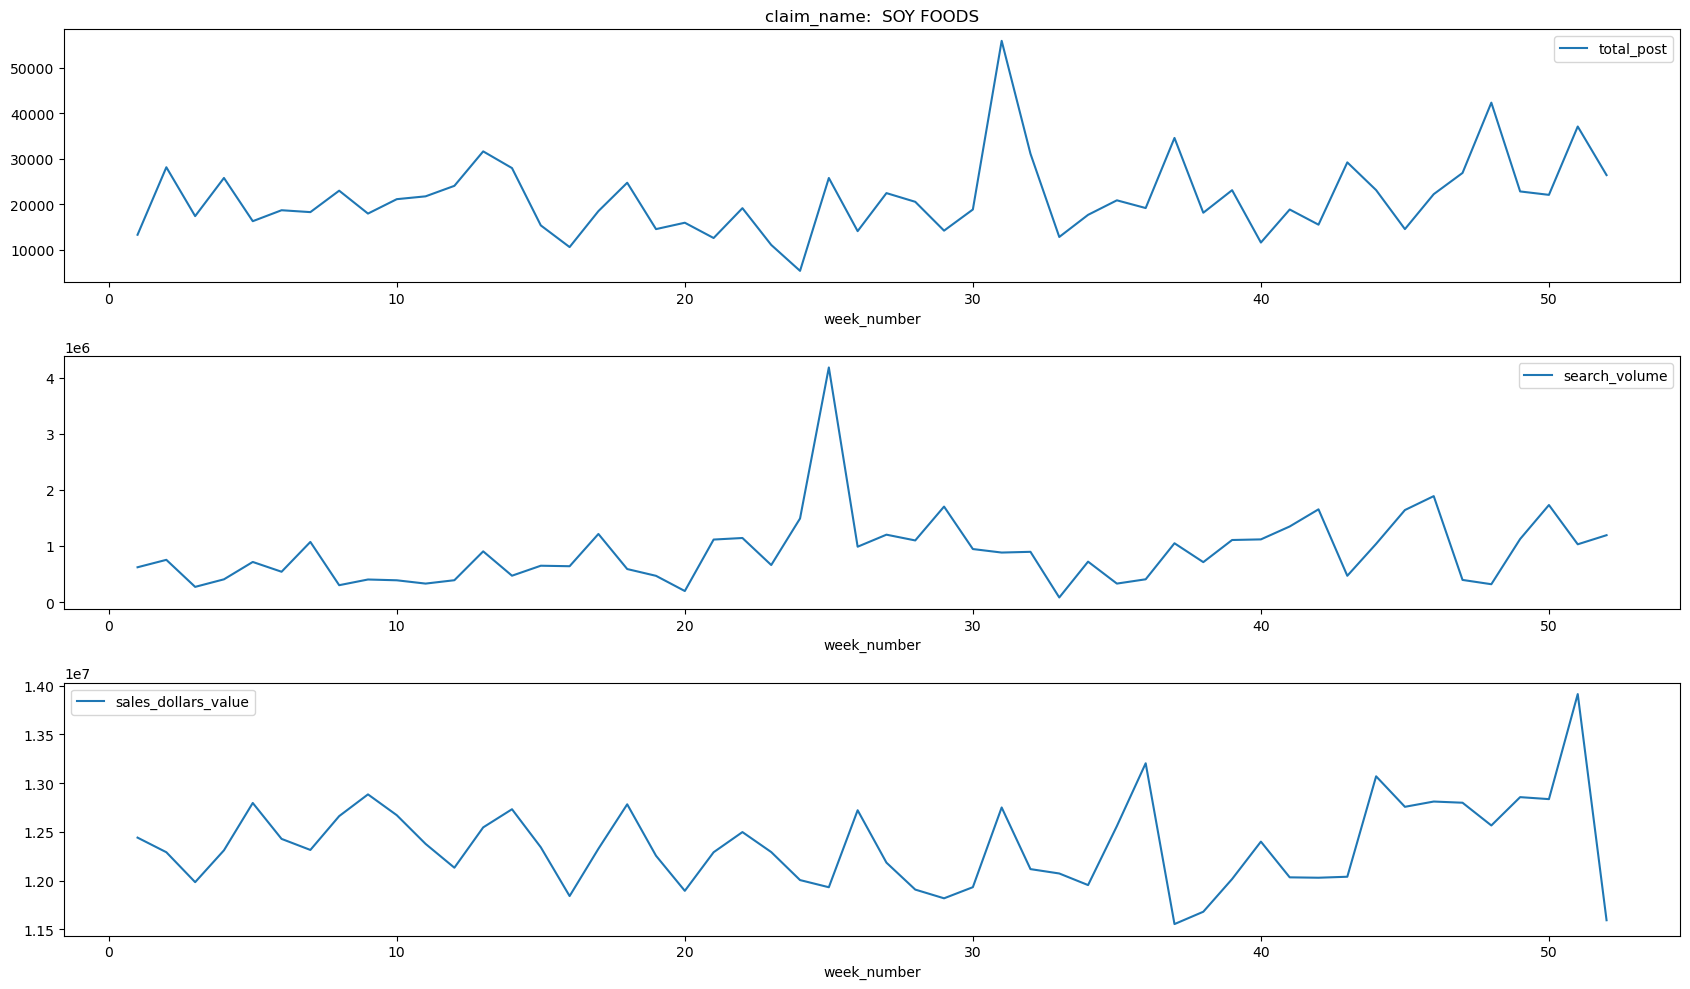

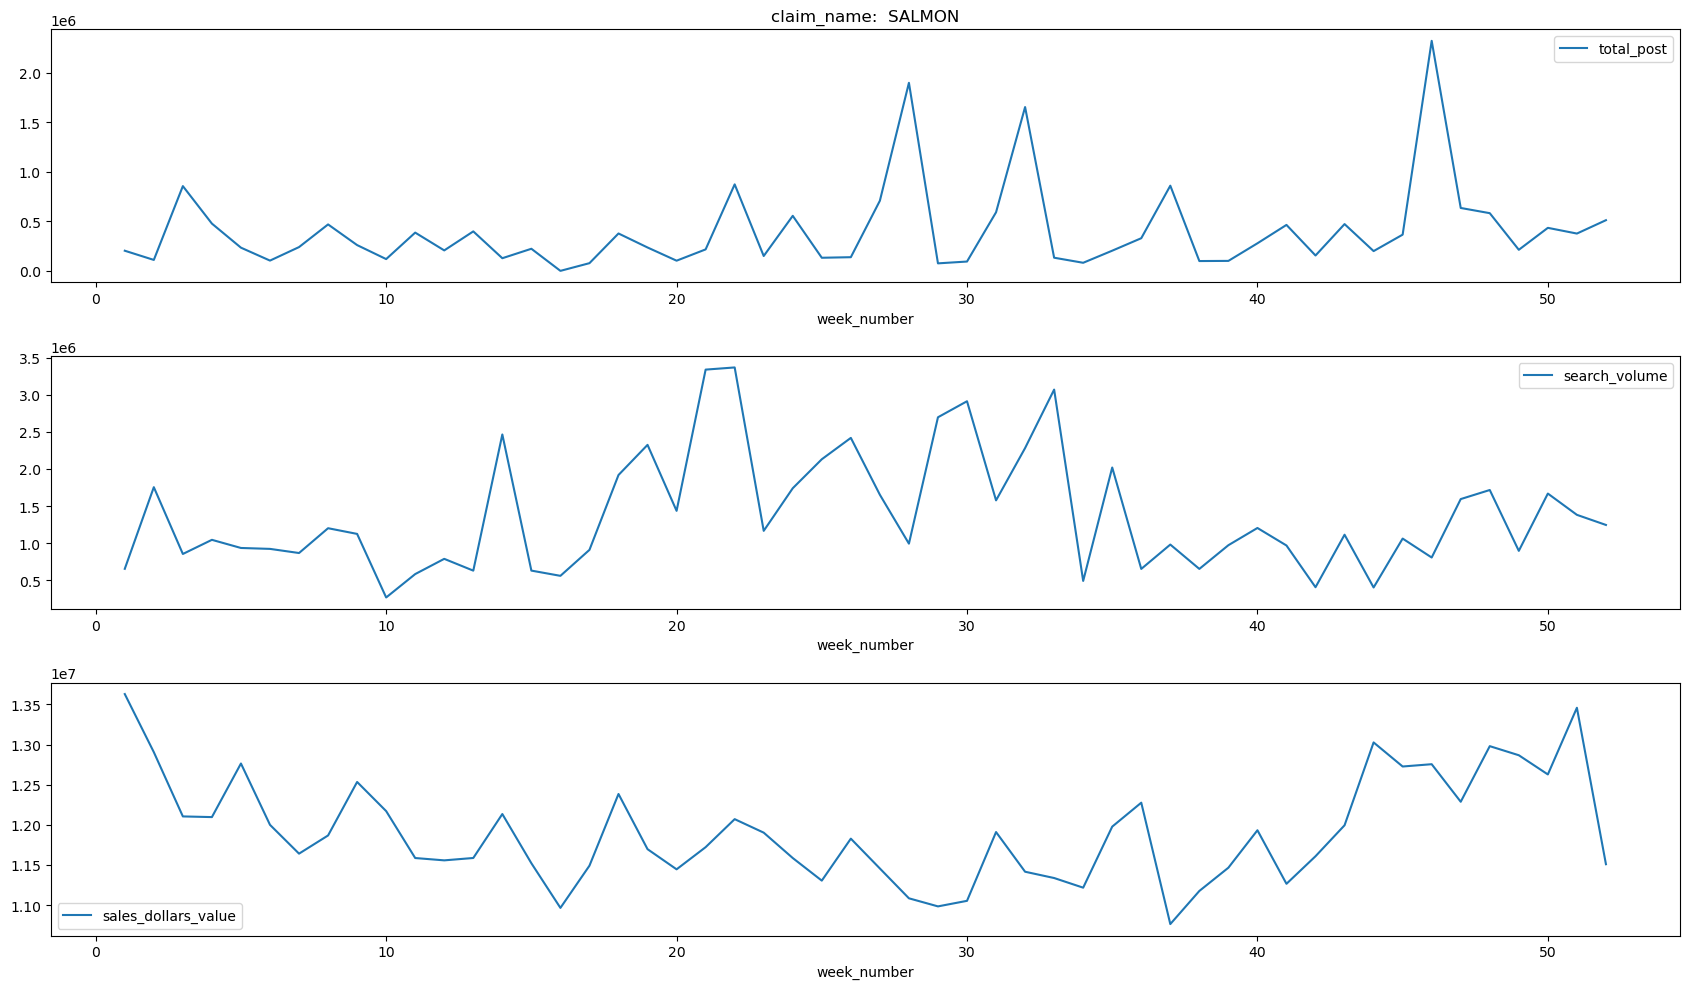

In [33]:
claim_name_list = ['chicken' , 'low calorie' , 'soy foods' , 'salmon']
for name in claim_name_list:   
    season = Claim_abc[(Claim_abc['claim_name']==name)]
    fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(17,10))
    season[season['year']==2017].sort_values(by=['week_number'],ascending=[True]).plot(x='week_number',y='total_post',ax=ax[0],kind='line')
    ax[0].set_title("claim_name:  " + str(name).upper())
    season[season['year']==2017].sort_values(by=['week_number'],ascending=[True]).plot(x='week_number',y='search_volume',ax=ax[1],kind='line')
    season[season['year']==2017].sort_values(by=['week_number'],ascending=[True]).plot(x='week_number',y='sales_dollars_value',ax=ax[2],kind='line')

## Model Building

In [34]:
merge_abc_vendor = pd.merge(merge_abc,product_manufacturer_list_clean,on='product_id',how='inner')
merge_info(merge_abc,product_manufacturer_list_clean, merge_abc_vendor)

n_cols   n_rows
left_df        13  7788429
right_df        2    67175
merged_df      14  7742148

In [35]:
merge_abc_vendor[merge_abc_vendor['vendor'] == 'A'].claim_id.nunique()

32

## Grouping data by vendor

In [36]:
vendorwise_data = merge_abc_vendor.groupby(['claim_id','week_number','year','date','vendor']).agg({'sales_dollars_value':'sum','sales_units_value':'sum','sales_lbs_value':'sum','search_volume':'mean','total_post':'mean','per_unit_value':'mean','per_lbs_value':'mean','per_unit_weight_lbs':'mean'}).reset_index()
vendorwise_data.head(5)

claim_id  week_number  year       date vendor  sales_dollars_value  \
0         0            1  2016 2016-01-09      A          132979903.0   
1         0            1  2016 2016-01-09      B           49338853.0   
2         0            1  2016 2016-01-09      D           41803515.0   
3         0            1  2016 2016-01-09      E           10310741.0   
4         0            1  2016 2016-01-09      F             792615.0   

   sales_units_value  sales_lbs_value  search_volume  total_post  \
0         57169507.0      136474508.0            NaN         NaN   
1         18067253.0       38308400.0            NaN         NaN   
2         11712644.0       32631454.5            NaN         NaN   
3          1057185.0       18019106.0            NaN         NaN   
4           162283.0         601812.0            NaN         NaN   

   per_unit_value  per_lbs_value  per_unit_weight_lbs  
0        7.079054       3.717751             6.588979  
1        9.888566       5.409966             5.344359  
2        7.066871       4.188794             4.943725  
3       11.727692       2.677987            15.789043  
4       16.829154       3.020746            11.521603

In [37]:
client_data = vendorwise_data[vendorwise_data['vendor'] == 'A'].sort_values(by='date')
client_data['month'] = client_data['date'].dt.month

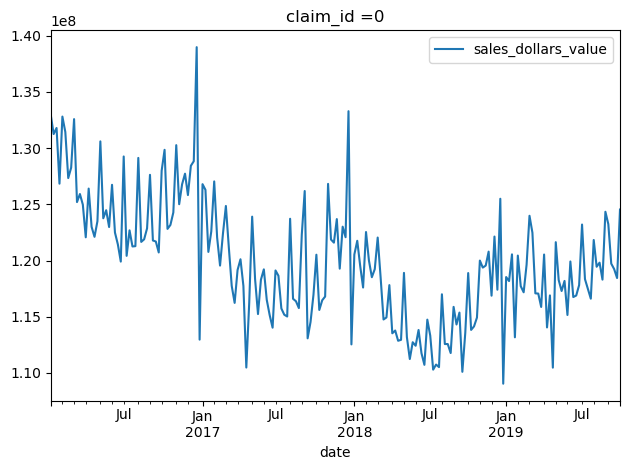

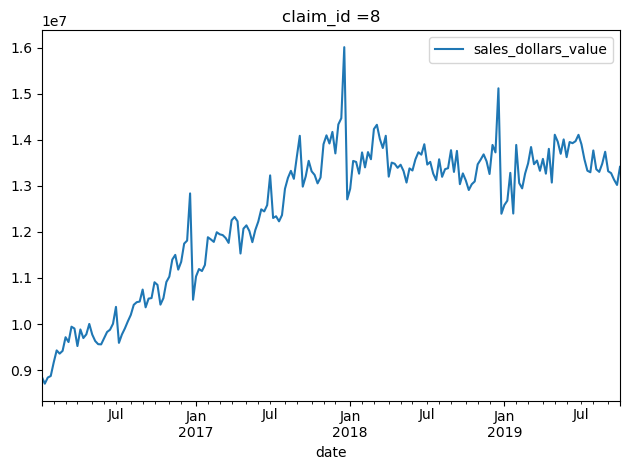

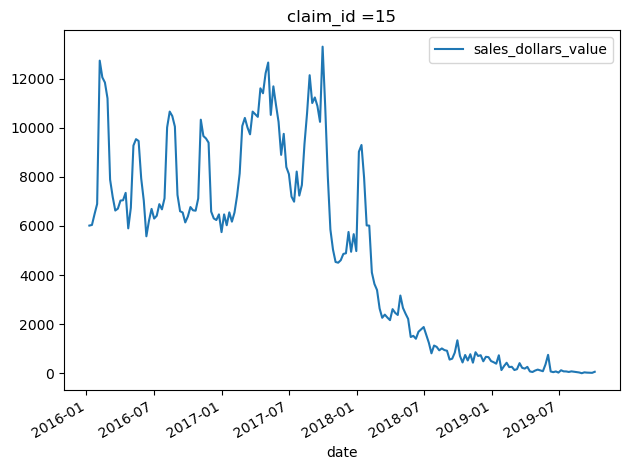

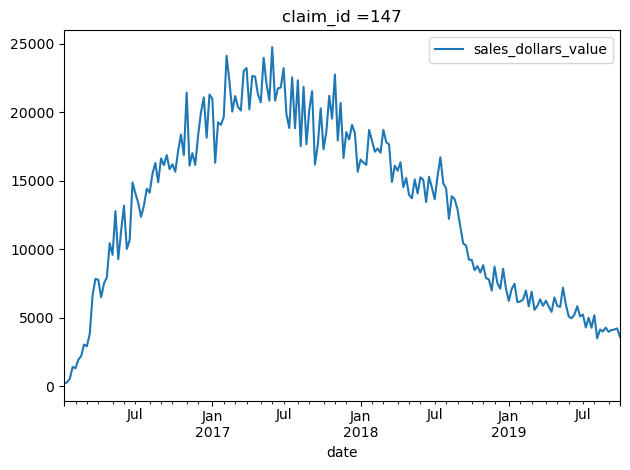

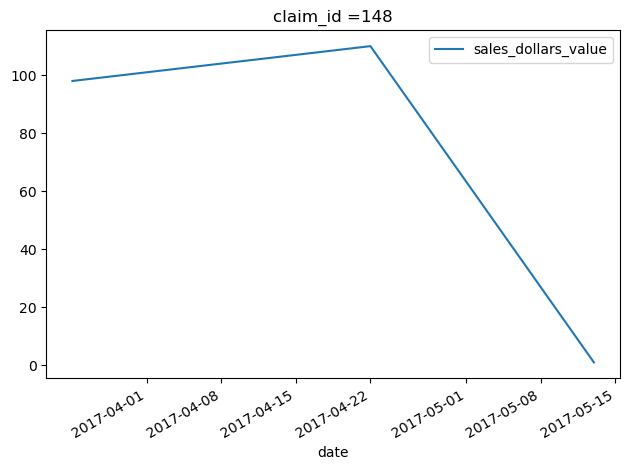

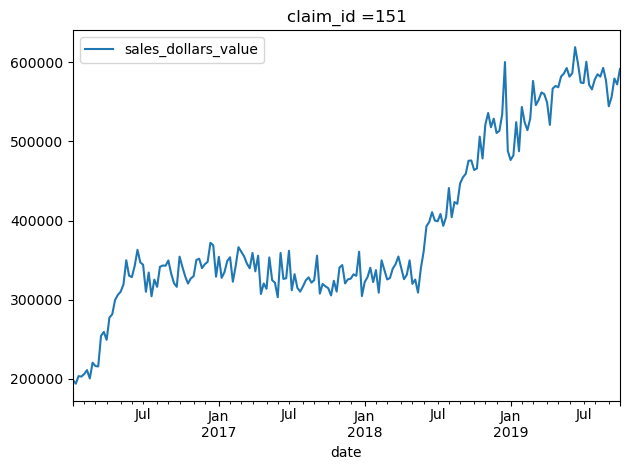

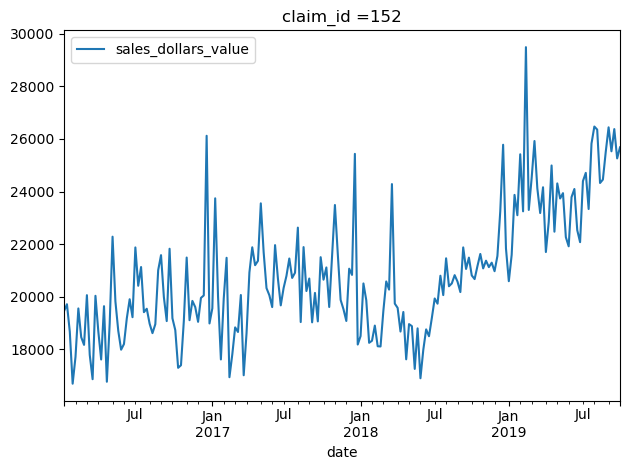

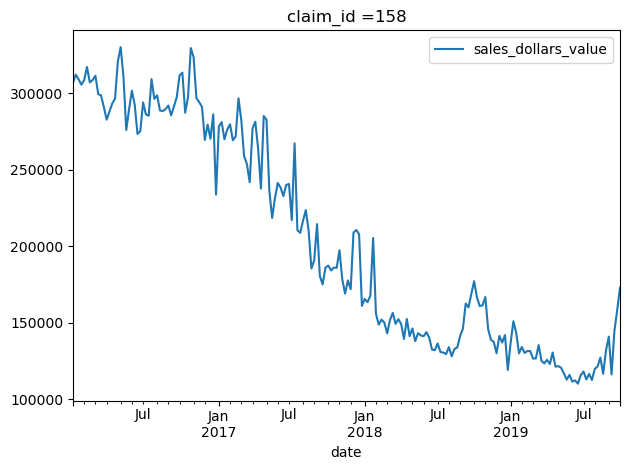

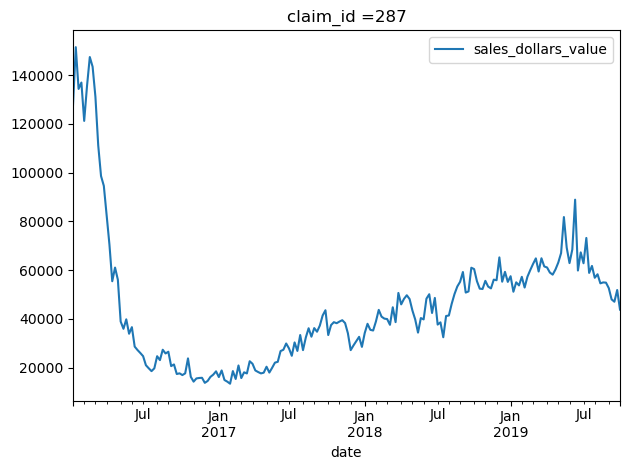

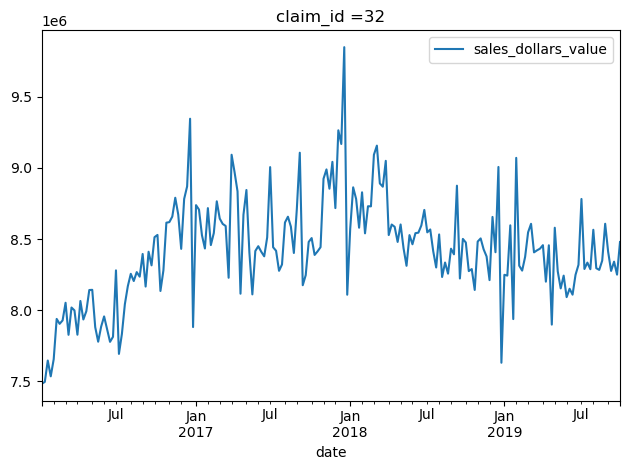

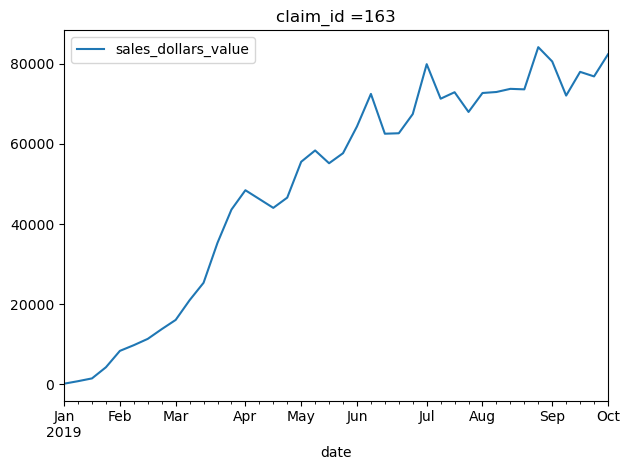

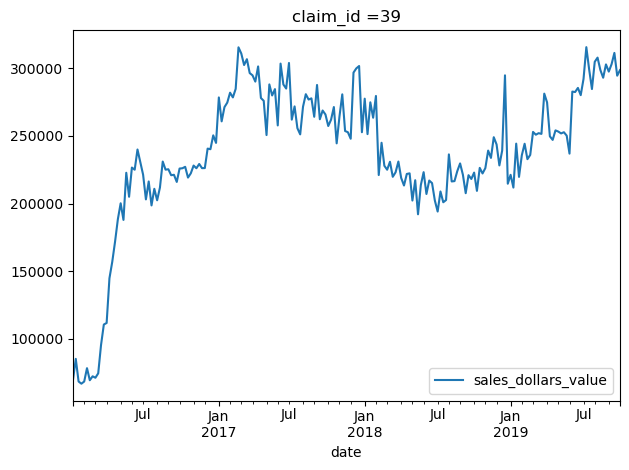

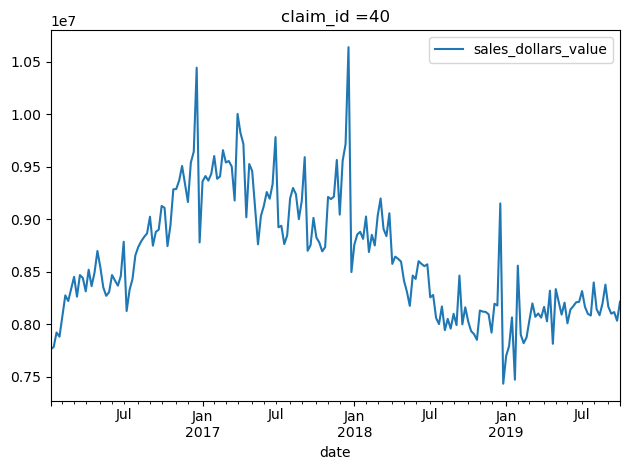

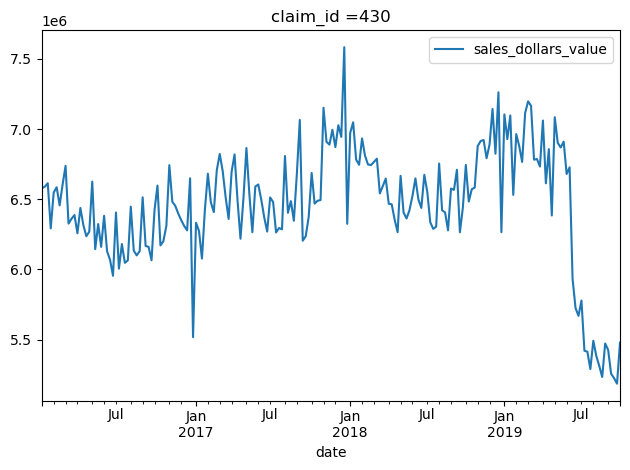

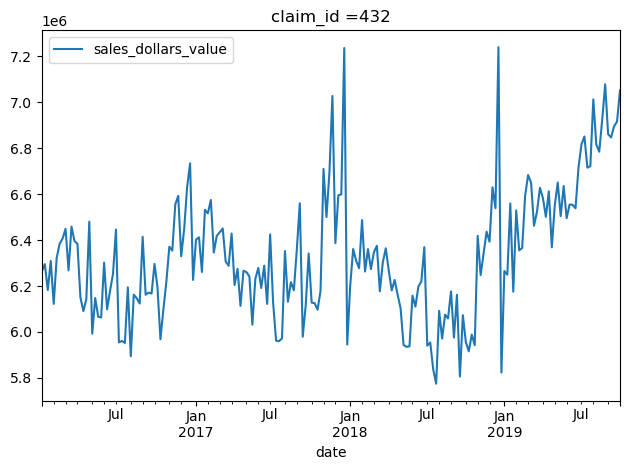

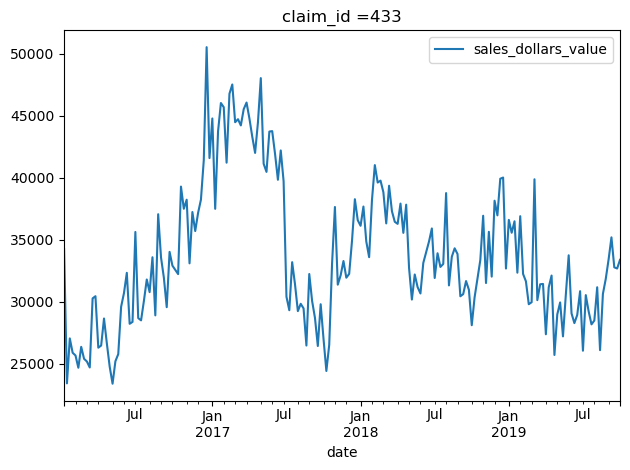

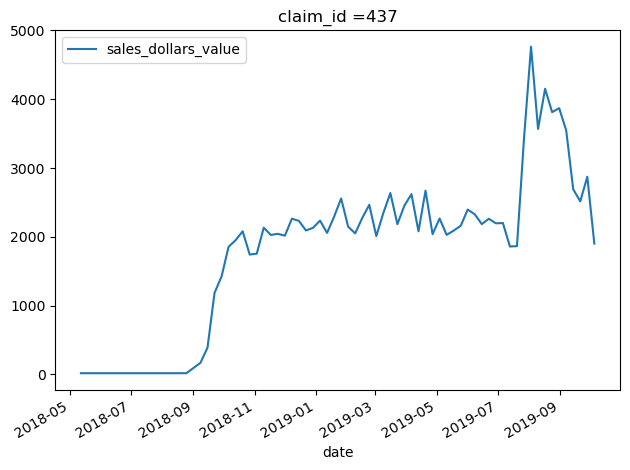

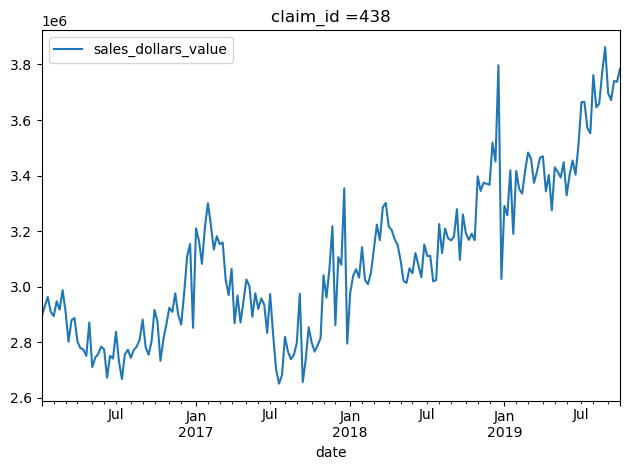

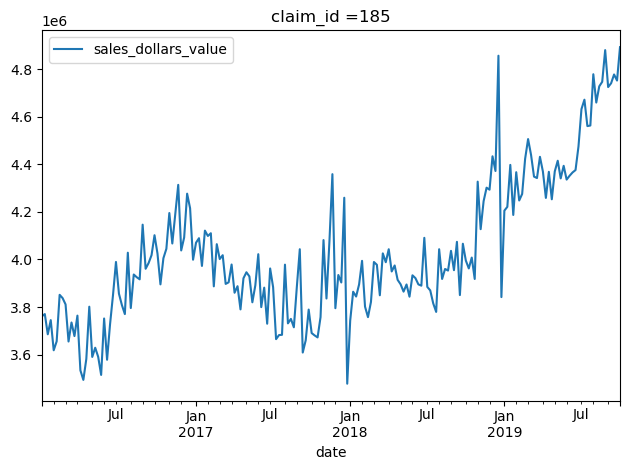

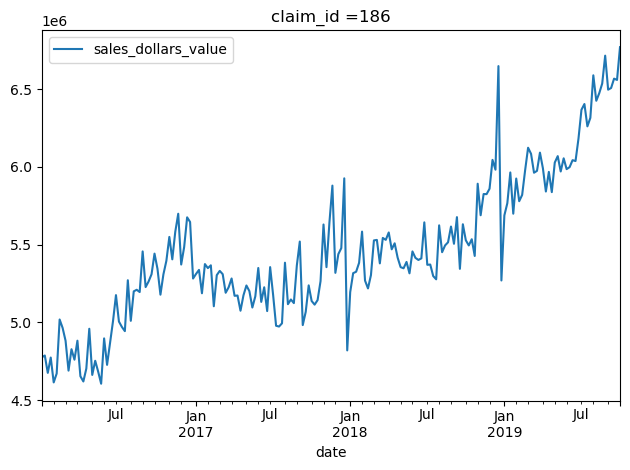

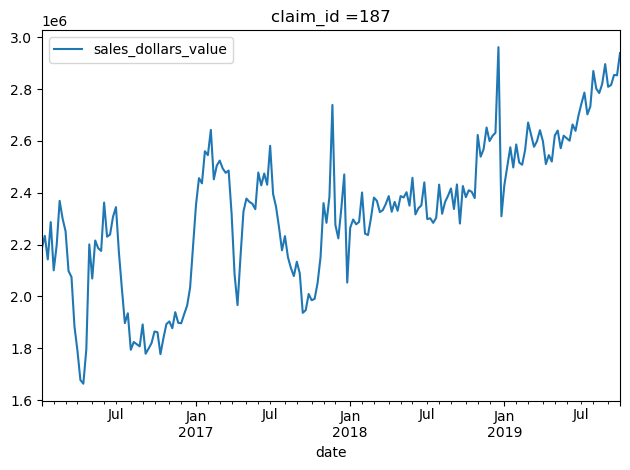

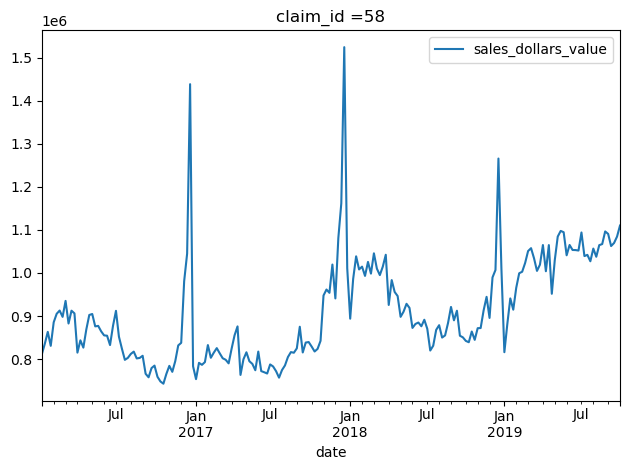

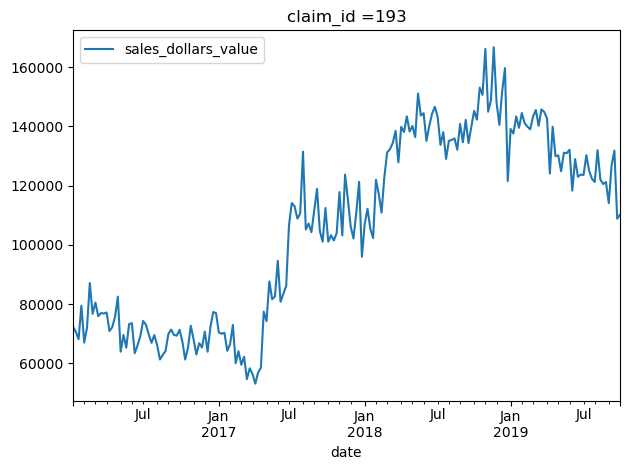

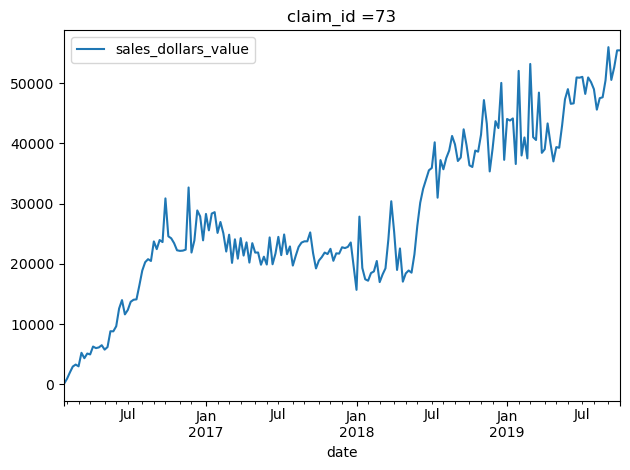

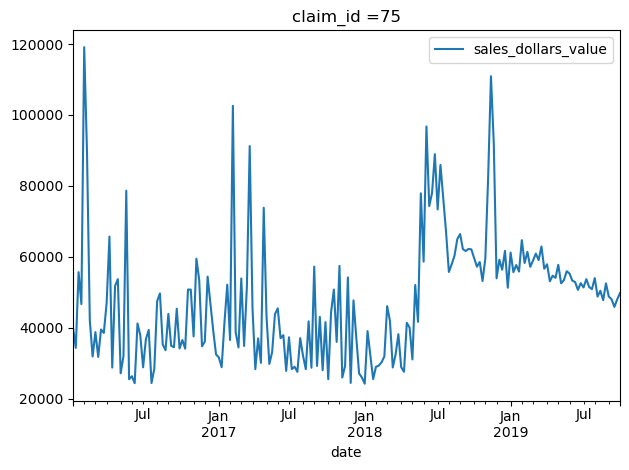

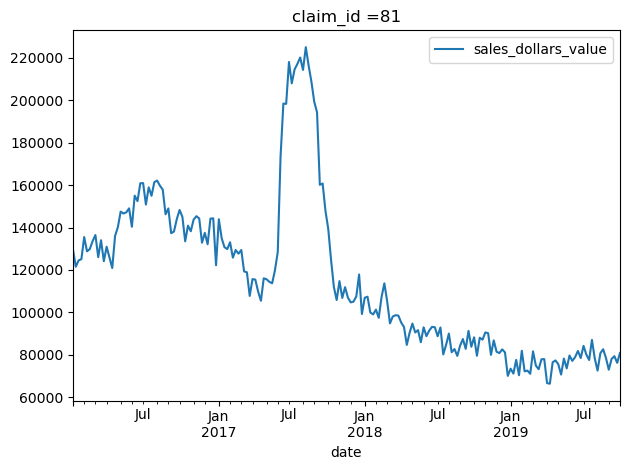

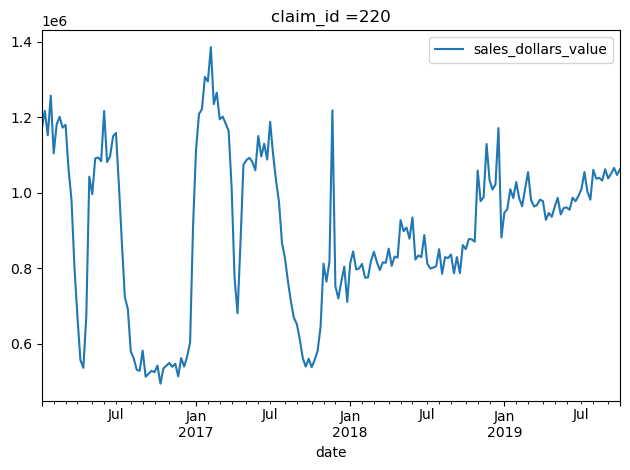

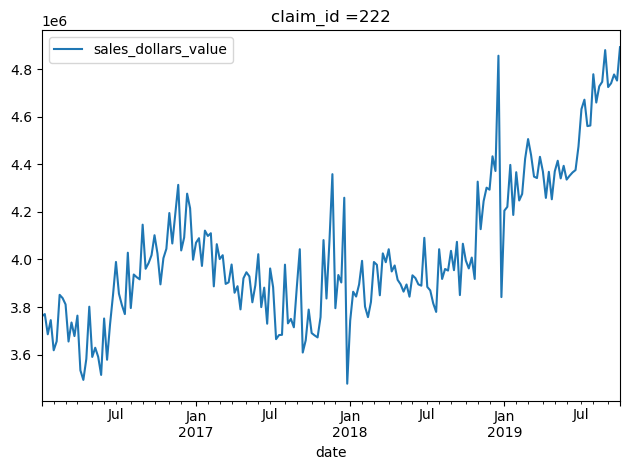

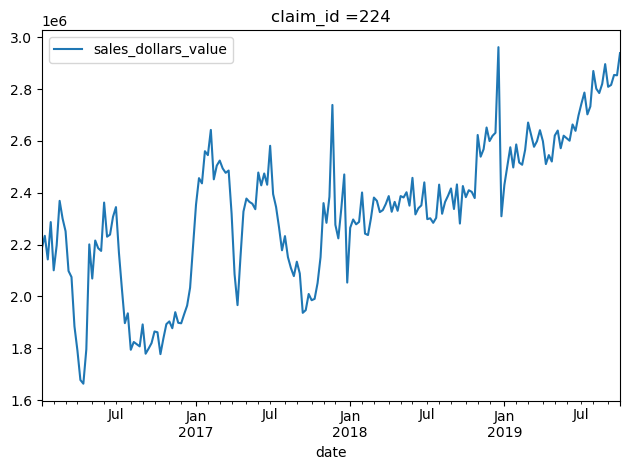

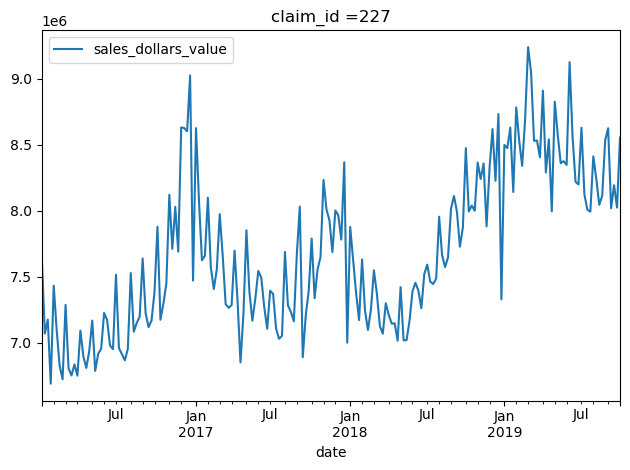

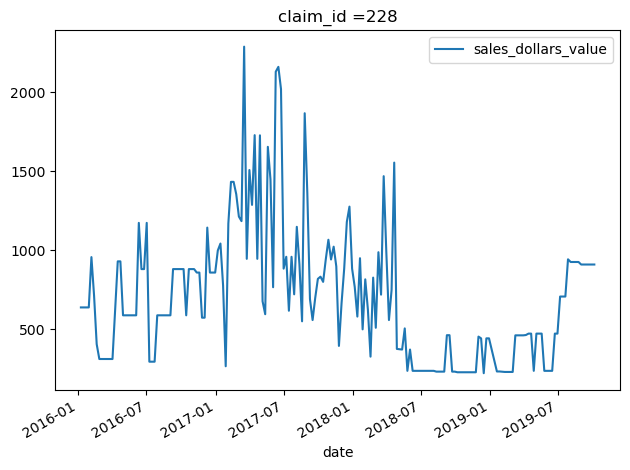

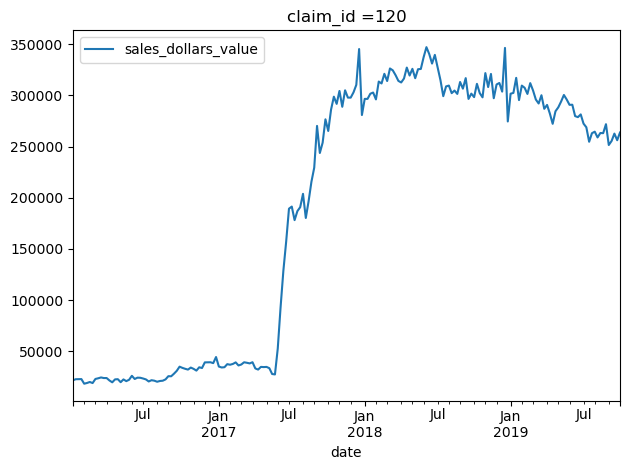

In [38]:
for claim in set(client_data.claim_id.to_list()):
  
  client_data[client_data['claim_id']==claim][['date','sales_dollars_value']].sort_values(by='date').plot(x='date',y='sales_dollars_value',title=("claim_id =" +str(claim)),kind='line')

### For claim 8

In [39]:
exp = client_data[client_data['claim_id']==8]
exp.fillna(0, inplace = True)

In [40]:
# Adding the lag from 1 steps back up to 13
for i in range(1, 13):
    #exp["post_lag_{}".format(i)] = exp.total_post.shift(i)
    exp["search_lag_{}".format(i)] = exp.search_volume.shift(i)
    exp["sales_lag_{}".format(i)] = exp.sales_dollars_value.shift(i)

In [42]:
# Will make timeseries model , so setting date as index
exp.sort_values(by='date',inplace=True)
exp_1 = exp.set_index('date')

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

# Importing everything from above
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error#,mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [44]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [45]:
y = exp_1.dropna().sales_dollars_value
X = exp_1.dropna().drop(['sales_dollars_value','sales_units_value','sales_lbs_value','vendor','claim_id'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [46]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
prediction = lr.predict(X_test_scaled)

In [49]:
print(mean_absolute_error(y_test.values ,np.around(prediction)))
print(mean_absolute_percentage_error(y_test.values ,np.around(prediction)))

467607.0
3.51189678934255


In [50]:
def plotModelResults(model, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test_scaled)
    
    plt.figure(figsize=(15, 7))
    plt.plot(np.around(prediction), "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train_scaled, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(y_test,prediction)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

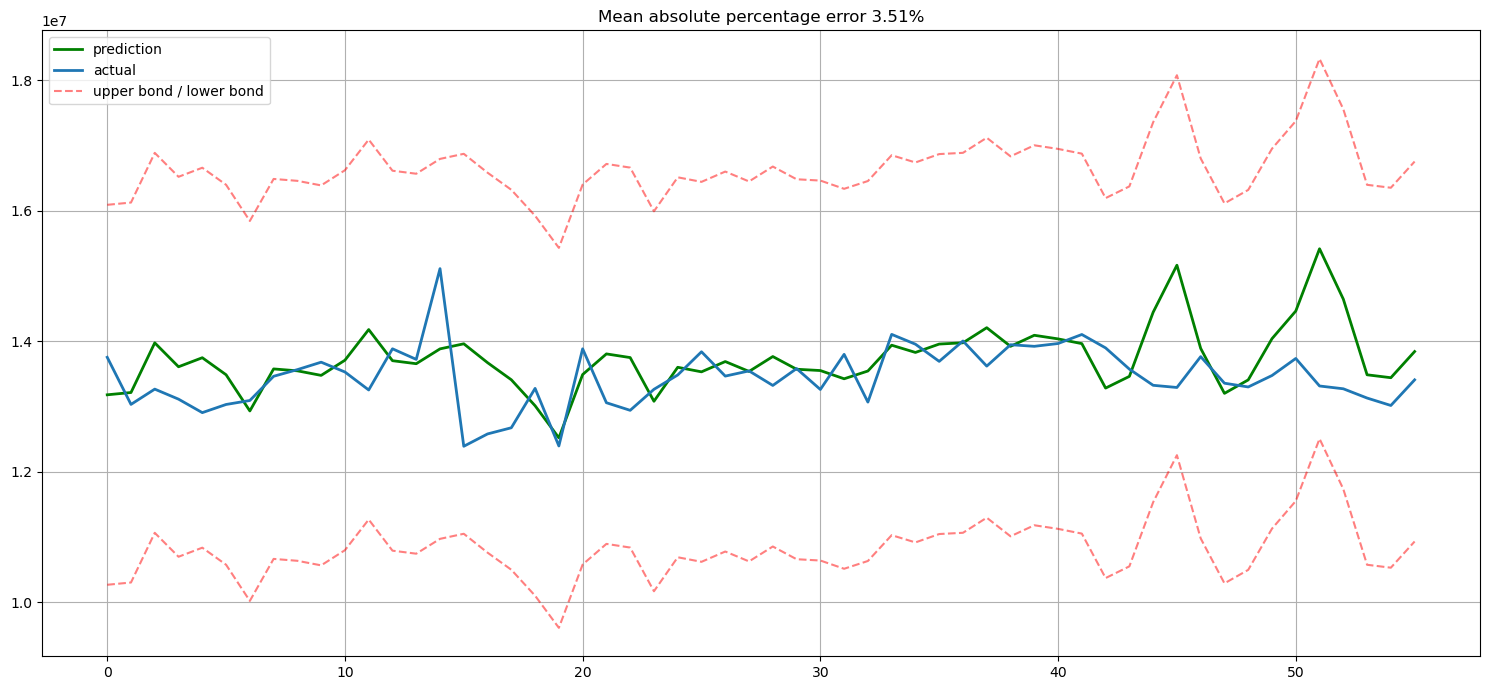

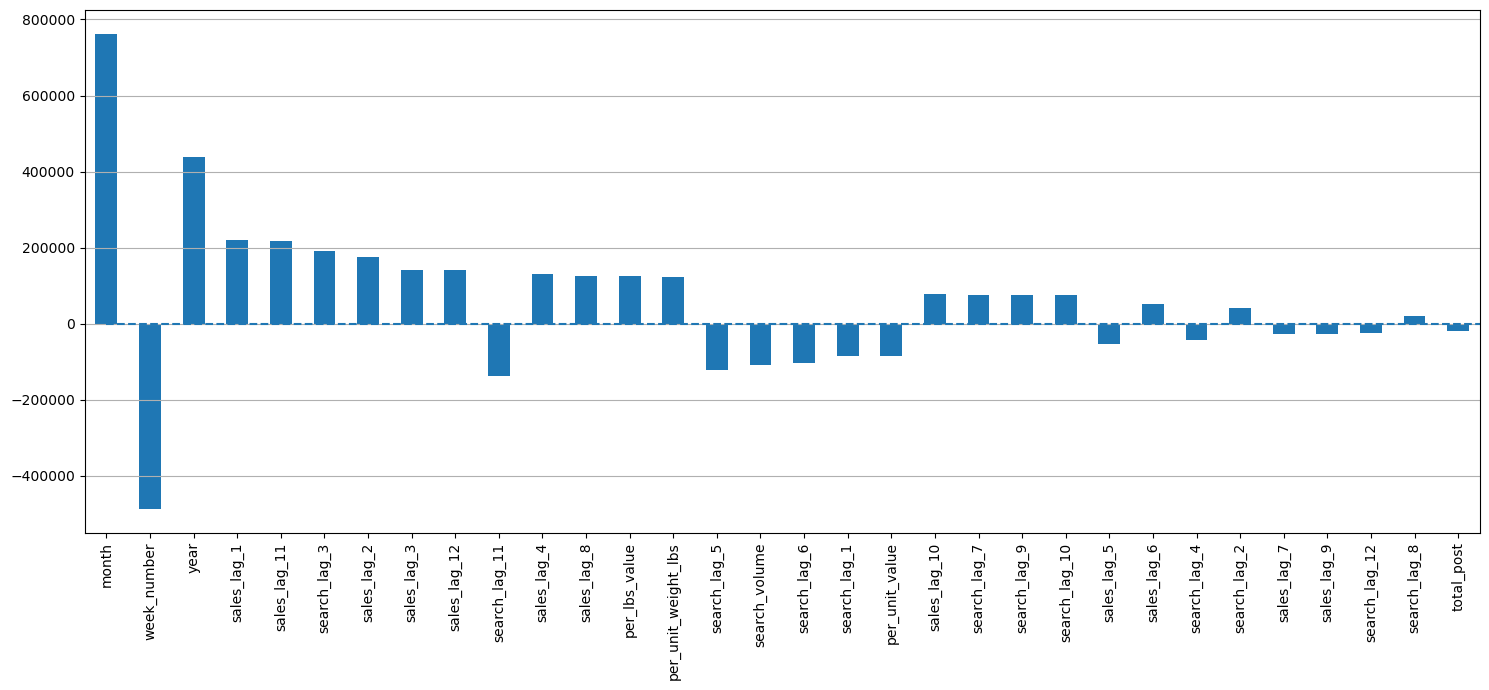

In [51]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

In [52]:
def get_sales_prediction(client_data,model):
  df_columns=[]
  df=pd.DataFrame(columns=df_columns)
  j=0
  for claim in client_data.claim_id.unique():
    exp = client_data[client_data['claim_id']==int(claim)]
    exp.fillna(0, inplace = True)
    if exp.shape[0] > 100:
      # Adding the lag of the target variable from 6 steps back up to 24
      for i in range(1, 13):
          #exp["post_lag_{}".format(i)] = exp.total_post.shift(i)
          exp["search_lag_{}".format(i)] = exp.search_volume.shift(i)
          exp["sales_lag_{}".format(i)] = exp.sales_dollars_value.shift(i)
      exp.sort_values(by='date',inplace=True)
      exp.set_index('date',inplace=True)
      exp_1 = exp
      scaler = StandardScaler()
      # for time-series cross-validation set 5 folds 
      
      y = exp_1.dropna().sales_dollars_value
      X = exp_1.dropna().drop(['sales_dollars_value','sales_units_value','sales_lbs_value','vendor','claim_id'], axis=1)

      # reserve 30% of data for testing
      X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)
      if X_train.shape[0]>100:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        #lr = LinearRegression()
        model.fit(X_train_scaled, y_train)
        prediction = model.predict(X_test_scaled)
        #insert in dataframe
        df.loc[j,"Claim_id"]= claim
        df.loc[j,"mape"]= round(mean_absolute_percentage_error(y_test,prediction),4)
        df.loc[j,"MAE"]= round(mean_absolute_error(y_test ,(prediction)),1)
        df.loc[j,"MSE"]= round(mean_squared_error(y_test ,(prediction)),1)
        df.loc[j,"RMSE"] = round(np.sqrt(mean_squared_error(y_test ,(prediction))),1)
        df.loc[j,"y_test_avg"] = round(np.average(y_test),1)
        df.loc[j,"y_test_pred_avg"] = round(np.average(prediction),1)
        j = j+1 
  
  return df 

In [53]:
final_12_lag = get_sales_prediction(client_data,lr)
final_12_lag

Claim_id       mape        MAE           MSE       RMSE   y_test_avg  \
0        0.0     4.5580  5435892.5  3.867429e+13  6218865.3  118245476.5   
1      193.0     9.7429    12453.4  3.161747e+08    17781.3     135546.3   
2      152.0   455.6992   113109.5  4.128594e+10   203189.4      23477.2   
3      228.0    54.3169      271.4  1.185361e+05      344.3        473.2   
4      438.0     2.4951    86370.6  1.539333e+10   124069.9    3445351.5   
5        8.0     3.5119   467607.1  4.360537e+11   660343.6   13456881.1   
6      430.0     6.1135   362260.7  2.258765e+11   475264.6    6402406.3   
7      151.0     8.1359    45095.9  2.545038e+09    50448.4     544907.1   
8       39.0     9.6249    25185.2  1.119243e+09    33455.1     257764.7   
9      187.0     5.0378   134950.4  2.808819e+10   167595.3    2621026.4   
10     158.0     7.8327    11137.8  2.452395e+08    15660.1     133796.9   
11     220.0     8.4158    82885.1  1.015452e+10   100769.6     984514.7   
12     222.0     2.4572   107171.9  2.241327e+10   149710.6    4390551.0   
13     287.0     7.4393     4509.6  3.830550e+07     6189.1      58846.7   
14     186.0     2.4400   147351.3  4.073515e+10   201829.5    6027062.8   
15      15.0  6020.2194      784.7  4.556425e+06     2134.6        337.5   
16      32.0     2.6307   221909.8  8.662855e+10   294327.3    8369220.2   
17      81.0     8.4570     6584.3  6.754272e+07     8218.4      78777.6   
18      40.0     5.6255   460462.7  2.733830e+11   522860.4    8102841.0   
19     185.0     2.4572   107171.9  2.241327e+10   149710.6    4390551.0   
20     120.0     6.6375    19197.8  4.878005e+08    22086.2     290136.2   
21      75.0    14.1663     8419.8  1.343899e+08    11592.7      57460.9   
22     432.0     2.9992   197646.7  6.463491e+10   254234.0    6527031.2   
23     224.0     4.1387   110473.1  2.104707e+10   145076.1    2621026.4   
24     227.0     5.5799   467753.5  3.319032e+11   576110.4    8354877.8   
25     433.0     7.7941     2538.8  1.117906e+07     3343.5      31936.7   
26     147.0    26.6985     1501.6  2.996993e+06     1731.2       6302.5   
27      58.0     5.4476    54540.6  5.044178e+09    71022.4    1001548.1   
28      73.0     8.5443     3640.8  2.253026e+07     4746.6      44607.3   

    y_test_pred_avg  
0       113121620.8  
1          136030.4  
2          133805.3  
3             211.3  
4         3406982.0  
5        13733549.2  
6         6587402.6  
7          501706.5  
8          259292.0  
9         2513148.0  
10         126905.4  
11        1042461.9  
12        4364497.8  
13          58983.5  
14        5955438.2  
15           -387.0  
16        8252355.1  
17          77345.6  
18        7661123.4  
19        4364497.8  
20         273140.5  
21          60074.1  
22        6368119.6  
23        2533532.1  
24        8254288.4  
25          31305.5  
26           5311.6  
27         984140.3  
28          46066.5

## Hyper parameters tuning

In [54]:
def get_sales_prediction_final(client_data,model):
  df_columns=[]
  df=pd.DataFrame(columns=df_columns)
  j=0
  for claim in client_data.claim_id.unique():
    test_avg = {}
    mape = {}
    mae = {}
    mse = {}
    rmse = {}
    test_pred_avg = {}
    exp = client_data[client_data['claim_id']==(claim)]
    # some dataset are too small to build a model, so that we are only taking those model , which have sufficint large dataset. 
    if exp.shape[0] > 100:
      # Adding the lag of the target variable from 1 steps back up to 12
      for lag in range(2,19):
        exp_1 = exp.fillna(0)
        for i in range(1, lag):
            #exp["post_lag_{}".format(i)] = exp.total_post.shift(i)
            exp_1["search_lag_{}".format(i)] = exp_1.search_volume.shift(i)
            exp_1["sales_lag_{}".format(i)] = exp_1.sales_dollars_value.shift(i)
        exp_1.sort_values(by='date',inplace=True)
        exp_1.set_index('date',inplace=True)
        
        scaler = StandardScaler()
        # for time-series cross-validation set 5 folds 
        
        y = exp_1.dropna().sales_dollars_value
        X = exp_1.dropna().drop(['sales_dollars_value','sales_units_value','sales_lbs_value','vendor','claim_id'], axis=1)

        # reserve 30% of data for testing
        X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)
        if X_train.shape[0]>100:
          X_train_scaled = scaler.fit_transform(X_train)
          X_test_scaled = scaler.transform(X_test)
          #lr = LinearRegression()
          model.fit(X_train_scaled, y_train)
          prediction = model.predict(X_test_scaled)
          # Creating dict 
          mae[lag] = round(mean_absolute_error(y_test ,(prediction)),1)
          mape[lag] = round(mean_absolute_percentage_error(y_test,prediction),4)
          mse[lag] = round(mean_squared_error(y_test ,(prediction)),1)
          rmse[lag] = round(np.sqrt(mean_squared_error(y_test ,(prediction))),1)
          test_pred_avg[lag] = round(np.average(prediction),1)
          test_avg[lag] = round(np.average(y_test),1)
          #insert in dataframe
      keys = [k for k, v in mae.items() if v == min(mae.values())]
      df.loc[j,"Claim_id"]= claim
      df.loc[j,"best_lag"]= keys[0]
      df.loc[j,"mape"]= mape[keys[0]]
      df.loc[j,"MAE"]= mae[keys[0]]
      df.loc[j,"MSE"]= mse[keys[0]]
      df.loc[j,"RMSE"] = rmse[keys[0]]
      df.loc[j,"y_test_avg"] = test_avg[keys[0]]
      df.loc[j,"y_test_pred_avg"] = test_pred_avg[keys[0]]
      j = j+1
  return df 

In [55]:
final = get_sales_prediction_final(client_data,lr)
final

Claim_id  best_lag      mape        MAE           MSE       RMSE  \
0        0.0      14.0    4.5511  5429248.7  3.879791e+13  6228796.8   
1      193.0       2.0    6.6010     8665.3  1.242535e+08    11146.9   
2      152.0       3.0  285.9333    70934.0  1.671442e+10   129284.3   
3      228.0       2.0   29.3713      143.8  3.910280e+04      197.7   
4      438.0      12.0    2.3798    82361.8  1.449375e+10   120390.0   
5        8.0      13.0    3.5119   467607.1  4.360537e+11   660343.6   
6      430.0       6.0    4.7956   290094.9  1.279367e+11   357682.5   
7      151.0       7.0    6.4481    35699.5  1.694150e+09    41160.1   
8       39.0       3.0    6.2944    16712.6  4.630768e+08    21519.2   
9      187.0       9.0    4.1591   110654.6  2.030475e+10   142494.7   
10     158.0      11.0    6.4947     9251.0  1.788319e+08    13372.8   
11     220.0       2.0    6.3233    61915.7  6.678774e+09    81723.8   
12     222.0       5.0    2.2603    97967.3  2.121368e+10   145649.2   
13     287.0      11.0    7.3045     4433.1  3.865770e+07     6217.5   
14     186.0      14.0    2.3820   143728.7  4.001192e+10   200029.8   
15      15.0       8.0  534.2590      321.6  2.701605e+05      519.8   
16      32.0       7.0    2.1671   181383.9  6.311166e+10   251220.3   
17      81.0       3.0    6.2227     4853.3  3.512275e+07     5926.4   
18      40.0       3.0    2.3725   192378.2  8.256025e+10   287333.0   
19     185.0       5.0    2.2603    97967.3  2.121368e+10   145649.2   
20     120.0       2.0    4.2865    12412.8  2.676473e+08    16359.9   
21      75.0      13.0   14.1663     8419.8  1.343899e+08    11592.7   
22     432.0      16.0    2.9224   192352.1  6.349109e+10   251974.4   
23     224.0       9.0    3.4531    91804.7  1.672395e+10   129321.1   
24     227.0       4.0    3.2349   273527.5  1.399011e+11   374033.5   
25     433.0       5.0    7.5347     2426.2  9.842470e+06     3137.3   
26     147.0       2.0   14.2106      915.0  1.283654e+06     1133.0   
27      58.0       5.0    4.3576    43679.5  3.765475e+09    61363.5   
28      73.0       8.0    7.8976     3384.5  1.962567e+07     4430.1   

     y_test_avg  y_test_pred_avg  
0   118297746.7      113201377.0  
1      135564.2         139951.4  
2       23326.8          90815.7  
3         460.4            381.5  
4     3445351.5        3409514.3  
5    13456881.1       13733549.2  
6     6408238.3        6501940.2  
7      543321.6         509913.1  
8      256096.8         244764.7  
9     2616051.8        2545046.9  
10     133796.9         128421.9  
11     975992.9        1008166.1  
12    4376935.4        4363892.7  
13      58846.7          59012.3  
14    6033430.5        5970043.4  
15        358.4            280.1  
16    8369627.9        8391821.5  
17      79031.2          78670.8  
18    8098463.6        8058173.0  
19    4376935.4        4363892.7  
20     290995.2         285807.7  
21      57460.9          60074.1  
22    6533673.5        6384786.6  
23    2616051.8        2550782.9  
24    8344851.8        8184116.0  
25      31943.8          31595.5  
26       6629.4           7122.2  
27     998239.0         980905.8  
28      44483.2          45192.2

In [56]:
final['lag_before'] = 12
final['mape_before'] = final_12_lag['mape']
final['MAE_before'] = final_12_lag['MAE']
final['mape_diff'] = final_12_lag['mape'] - final['mape']
final['MAE_diff'] = final_12_lag['MAE'] - final['MAE']
final.drop("MSE",axis=1)

Claim_id  best_lag      mape        MAE       RMSE   y_test_avg  \
0        0.0      14.0    4.5511  5429248.7  6228796.8  118297746.7   
1      193.0       2.0    6.6010     8665.3    11146.9     135564.2   
2      152.0       3.0  285.9333    70934.0   129284.3      23326.8   
3      228.0       2.0   29.3713      143.8      197.7        460.4   
4      438.0      12.0    2.3798    82361.8   120390.0    3445351.5   
5        8.0      13.0    3.5119   467607.1   660343.6   13456881.1   
6      430.0       6.0    4.7956   290094.9   357682.5    6408238.3   
7      151.0       7.0    6.4481    35699.5    41160.1     543321.6   
8       39.0       3.0    6.2944    16712.6    21519.2     256096.8   
9      187.0       9.0    4.1591   110654.6   142494.7    2616051.8   
10     158.0      11.0    6.4947     9251.0    13372.8     133796.9   
11     220.0       2.0    6.3233    61915.7    81723.8     975992.9   
12     222.0       5.0    2.2603    97967.3   145649.2    4376935.4   
13     287.0      11.0    7.3045     4433.1     6217.5      58846.7   
14     186.0      14.0    2.3820   143728.7   200029.8    6033430.5   
15      15.0       8.0  534.2590      321.6      519.8        358.4   
16      32.0       7.0    2.1671   181383.9   251220.3    8369627.9   
17      81.0       3.0    6.2227     4853.3     5926.4      79031.2   
18      40.0       3.0    2.3725   192378.2   287333.0    8098463.6   
19     185.0       5.0    2.2603    97967.3   145649.2    4376935.4   
20     120.0       2.0    4.2865    12412.8    16359.9     290995.2   
21      75.0      13.0   14.1663     8419.8    11592.7      57460.9   
22     432.0      16.0    2.9224   192352.1   251974.4    6533673.5   
23     224.0       9.0    3.4531    91804.7   129321.1    2616051.8   
24     227.0       4.0    3.2349   273527.5   374033.5    8344851.8   
25     433.0       5.0    7.5347     2426.2     3137.3      31943.8   
26     147.0       2.0   14.2106      915.0     1133.0       6629.4   
27      58.0       5.0    4.3576    43679.5    61363.5     998239.0   
28      73.0       8.0    7.8976     3384.5     4430.1      44483.2   

    y_test_pred_avg  lag_before  mape_before  MAE_before  mape_diff  MAE_diff  
0       113201377.0          12       4.5580   5435892.5     0.0069    6643.8  
1          139951.4          12       9.7429     12453.4     3.1419    3788.1  
2           90815.7          12     455.6992    113109.5   169.7659   42175.5  
3             381.5          12      54.3169       271.4    24.9456     127.6  
4         3409514.3          12       2.4951     86370.6     0.1153    4008.8  
5        13733549.2          12       3.5119    467607.1     0.0000       0.0  
6         6501940.2          12       6.1135    362260.7     1.3179   72165.8  
7          509913.1          12       8.1359     45095.9     1.6878    9396.4  
8          244764.7          12       9.6249     25185.2     3.3305    8472.6  
9         2545046.9          12       5.0378    134950.4     0.8787   24295.8  
10         128421.9          12       7.8327     11137.8     1.3380    1886.8  
11        1008166.1          12       8.4158     82885.1     2.0925   20969.4  
12        4363892.7          12       2.4572    107171.9     0.1969    9204.6  
13          59012.3          12       7.4393      4509.6     0.1348      76.5  
14        5970043.4          12       2.4400    147351.3     0.0580    3622.6  
15            280.1          12    6020.2194       784.7  5485.9604     463.1  
16        8391821.5          12       2.6307    221909.8     0.4636   40525.9  
17          78670.8          12       8.4570      6584.3     2.2343    1731.0  
18        8058173.0          12       5.6255    460462.7     3.2530  268084.5  
19        4363892.7          12       2.4572    107171.9     0.1969    9204.6  
20         285807.7          12       6.6375     19197.8     2.3510    6785.0  
21          60074.1          12      14.1663      8419.8     0.0000       0.0  
22        6384786.6          12  